<h1 align='center'>ENGC63 - 3º Projeto</h1>

**Universidade Federal da Bahia - UFBA**

**Disciplina :** Processamento Digital de Sinais

**Discentes :** Miguel Feliciano Mota Alves e Rodrigo Freitas Sá Barretto

## Introdução

A janela de kaiser é definida por:

$$
w[n] = 
\begin{cases}
\displaystyle
\frac{I_0[\beta(1-[\frac{(n-\alpha)}{\alpha}]^2)^{1/2}]}{I_0(\beta)}\\
0, & \text{caso contrário}
\end{cases}
$$

onde $\alpha = M/2$ e $I_0(\cdot)$ é a função de Besel modificada.

Para implementar o filtro FIR utilizando a **janela de Kaiser**, diferentemente dos outros tipos de janela, primeiro define-se as especificações do filtro desejado e, com as especificações definidas, calcula-se os parâmetros da janela $\beta$ e $M$ da janela.

## Dados do Projeto

A seguir estão as especificações definidas para o projeto do filtro.

### 1. Especificações de Frequência

Com uma frequência de corte central ($\omega_c$) e uma largura de banda de transição ($\Delta\omega$) definidas, as frequências da banda de passagem ($\omega_p$) e da banda de rejeição ($\omega_s$) podem ser encontradas a partir delas.

* **Frequência de Corte Central ($\omega_c$):**
    $$\omega_c = \frac{\pi}{2} \text{ rad/amostra}$$

* **Largura da Banda de Transição ($\Delta\omega$):**
    $$\Delta\omega = 0.1\pi \text{ rad/amostra}$$

* **Banda de Passagem:** O filtro deve passar frequências no intervalo $[0, \omega_p]$, $\omega_p = \omega_c - (\Delta\omega/2)$.
    $$0 \le \omega \le 0.45\pi \text{ rad/amostra}$$

* **Banda de Rejeição:** O filtro deve rejeitar frequências no intervalo $[\omega_s, \pi]$, $\omega_s = \omega_c + (\Delta\omega/2)$, até $\pi$.
    $$0.55\pi \le \omega \le \pi \text{ rad/amostra}$$

### 2. Ripple e Atenuação

Como, para o projeto por janela, o filtro resultante terá o mesmo erro de pico na banda de passagem e na banda de rejeição, isto é, $\delta_p = \delta_s$ e a atenuação na banda de rejeição pode ser definida por:

$$A_s = -20 \log_{10}(|H(e^{j\omega})|) \ge 50 \text{ dB}$$

portanto:

$$\delta_p = \delta_s \approx 0.00316$$

### 3. Intervalos de Tolerância

Com base nas especificações de frequência e nos valores de *ripple* definidos, os intervalos de tolerância para a magnitude da resposta em frequência, $|H(e^{j\omega})|$, são os seguintes:

* **Na Banda de Passagem ($0 \le \omega \le 0.45\pi$):** O ganho deve estar dentro do seguinte intervalo: 
    $$0.99684 \le |H(e^{j\omega})| \le 1.00316$$

* **Na Banda de Rejeição ($0.55\pi \le \omega \le \pi$):** O ganho deve ser suprimido para o seguinte intervalo:
    $$ 0 \le |H(e^{j\omega})| \le 0.00316$$

In [1]:
from scipy.signal import kaiserord, firwin, freqz, tf2sos, sosfreqz
import numpy as np  #np.np.pi, log10, abs, arange, where, angle, unwrap, gradient
import matplotlib.pyplot as plt

## 1. Criação do Filtro

### Definição das Variáveis do Filtro

In [2]:
w_cutoff = np.pi / 2                  # Frequência de corte [rad/amostra]
w_transition = 0.1 * np.pi            # Região de transição [rad/amostra]
A = 50                                # Atenuação [dB]
w_pass = w_cutoff - w_transition/2    # Banda de passagem [rad/amostra]
w_stop = w_cutoff + w_transition/2    # Banda de rejeição [rad/amostra]
erro = 0.00316                        # Erro máximo

print(f'Frequência de corte: {w_cutoff/np.pi}π')
print(f'Região de transição: {w_transition/np.pi}π')
print(f'Banda de passagem: {w_pass/np.pi}π')
print(f'Banda de rejeição: {w_stop/np.pi}π')
print(f'Atenuação: {A} dB')
print(f'Erro máximo: {erro}')

Frequência de corte: 0.5π
Região de transição: 0.1π
Banda de passagem: 0.45π
Banda de rejeição: 0.55π
Atenuação: 50 dB
Erro máximo: 0.00316


### Definição de Parâmetros da Janela de Kaiser

In [3]:
M, beta = kaiserord(A, w_transition / np.pi) # Calcula a ordem e o beta da janela kaiser
print(f'Ordem do filtro: {M}')
print(f'β = {beta}')

Ordem do filtro: 60
β = 4.533514120981248


Para este projeto, a ordem escolhida do filtro será PAR, para que o filtro projetado seja de tipo 1 e não imponha restrições. Isso é essencial para uma etapa futura do trabalho, onde serão feitas transformações do filtro passa-baixas para outros tipos de filtro (e.g. passa-altas). Se outros tipos de filtro fossem utilizados, as restrições existentes para esses tipos poderiam levar a resultados indesejados.

### Criação do Filtro

In [4]:
'''
1 - numtaps = Ordem(FIR) + 1, se M é par, numtaps é impar
2 - Cria o filtro usando a janela Kaiser
3 - Cutoff precisa ser normalizado
4 - Por padrão a biblioteca scipy implementa o filtro na forma direta
''' 
fir_direct = firwin(numtaps=M+1, cutoff=w_cutoff / np.pi, window=('kaiser', beta), pass_zero='lowpass')

## 2. Análise do Filtro na Estrutura Direta Com Precisão Infinita

In [ ]:
# Convenção para nome de variáveis
# X : Forma (direta ou cascata)
# Y : Número de casas decimais (Caso não seja definido, considerado 'infinito')

def calculate_variables(omega_X_norm_Y, response_X_Y):
    response_mag = abs(response_X_Y)                           # |H(e^jw)|
    response_dB = 20 * np.log10(abs(response_X_Y))             # Resposta em dB
    phase = np.unwrap(np.angle(response_X_Y))                  # Fase unwraped
    group_delay = -np.gradient(phase, omega_X_norm_Y * np.pi)  # Atraso de grupo
    
    return response_mag, response_dB, phase, group_delay

def plot_graphs(omega_X_norm_Y, response_X_Y, form:str, precision:str, gd_flag: bool = False):
    
    response_mag, response_dB, phase, group_delay = calculate_variables(omega_X_norm_Y, response_X_Y)

    # Filtro passa-baixas ideal para comparação e cálculo de erro
    lpf_ideal = np.where(omega_X_norm_Y <= w_cutoff / np.pi, 1.0, 0.0) 

    if gd_flag:
        linhas = 4
        altura = 16
    else:
        linhas = 3
        altura = 13
        
    
    fig, axes = plt.subplots(linhas, 1, figsize=(14, altura))

    # Gráfico 1: |H(e^jw)|
    axes[0].plot(omega_X_norm_Y, response_mag, label='Resposta Passa-Baixas Kaiser', color='blue', linewidth=2)
    axes[0].plot(omega_X_norm_Y, lpf_ideal, color='orange', linestyle='--', linewidth=1.3, label='LPF Ideal')
    axes[0].set_title('Magnitude X Resposta Ideal')
    axes[0].set_xlabel('Frequência Normalizada (ω / π)')
    axes[0].set_ylabel('|H(e^jw)|')
    axes[0].set_xticks(np.arange(0, 1.05, 0.05))
    axes[0].set_xlim(0, 1.0)
    axes[0].set_ylim(-0.05, 1.1)
    axes[0].axvline(0.45, color='red', linestyle='--', linewidth=1.5, label='ω pass')
    axes[0].axvline(0.55, color='green', linestyle='--', linewidth=1.5, label='ω stop')
    axes[0].axvspan(0.45, 0.55, color='gray', alpha=0.2, label='Região de Transição')
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.8)
    axes[0].legend()

    # Gráfico 2: Ganho em dB
    axes[1].plot(omega_X_norm_Y, response_dB, color='blue', linewidth=2, label='Magnitude [dB]')
    axes[1].set_title('Magnitude Logarítimica')
    axes[1].set_xlabel('Frequência Normalizada (ω / π)')
    axes[1].set_ylabel('dB')
    axes[1].set_xticks(np.arange(0, 1.05, 0.05))
    axes[1].set_yticks(np.arange(-100, 10, 10))
    axes[1].set_ylim(-100, 5)
    axes[1].set_xlim(0, 1.0)
    axes[1].axhline(-50, color='orange', linestyle='--', linewidth=1.5, label='Atenuação Mínima')
    axes[1].axvline(0.50, color='purple', linestyle='--', linewidth=1.5, label='ω cutoff')
    axes[1].axvline(0.45, color='red', linestyle='--', linewidth=1.5, label='ω pass')
    axes[1].axvline(0.55, color='green', linestyle='--', linewidth=1.5, label='ω stop')
    axes[1].axvspan(0.45, 0.55, color='gray', alpha=0.2, label='Região de Transição')
    axes[1].grid(True, which='both', linestyle=':', linewidth=0.8)
    axes[1].legend()


    # Gráfico 2: Fase
    axes[2].plot(omega_X_norm_Y, phase, color='purple')
    axes[2].set_title('Fase (Unwraped)')
    axes[2].set_xlabel('Frequência Normalizada (ω / π)')
    axes[2].set_ylabel('Fase')
    axes[2].set_xlim(0, 1.0)
    axes[2].set_xticks(np.arange(0, 1.05, 0.05))
    axes[2].grid(True)

    # Gráfico 3: Atraso de Grupo
    if gd_flag:
        axes[3].plot(omega_X_norm_Y, group_delay, color='darkgreen')
        axes[3].set_title('Atraso de Grupo')
        axes[3].set_xlabel('Frequência Normalizada (ω / π)')
        axes[3].set_ylabel('Atraso de Grupo')
        axes[3].set_xlim(0, 1.0)
        axes[3].set_xticks(np.arange(0, 1.05, 0.05))
        axes[3].grid(True)

    plt.suptitle(f'Filtro Passa-Baixas Kaiser Precisão {precision} ({form})', fontsize=14, y=1.0001)
    plt.tight_layout() 
    plt.show()
    
def plot_errors(omega_X_norm_Y, response_X_Y, form:str, precision:str):
    
    response_mag, response_dB, phase, group_delay = calculate_variables(omega_X_norm_Y, response_X_Y)    
    
    lpf_ideal = np.where(omega_X_norm_Y <= w_cutoff / np.pi, 1.0, 0.0) 
    
    # Erro de aproximação = H(ω) - LPF(ω)
    erro = response_mag - lpf_ideal

    # Erro de aproximação absoluto = |H(ω) - LPF(ω)|
    erro_abs = abs(response_mag - lpf_ideal)

    # Arrays de bools para truncar a resposta na faixa de transição
    truncate_pass = omega_X_norm_Y <= w_pass / np.pi
    truncate_stop = omega_X_norm_Y >= w_stop / np.pi

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    # Gráfico 1: Erro de aproximação
    axes[0].plot(omega_X_norm_Y, erro, color='red', linewidth=2, label='Erro')
    axes[0].set_title('Erro de Aproximação')
    axes[0].set_xlabel('Frequência Normalizada (ω / π)')
    axes[0].set_ylabel('Erro')
    axes[0].set_xticks(np.arange(0, 1.1, 0.1))
    axes[0].set_yticks(np.arange(-0.5, 0.6, 0.1))
    axes[0].set_xlim(0, 1.0)
    axes[0].grid(True)
    axes[0].legend()

    # Gráfico 2: Erro absoluto de aproximação
    axes[1].plot(omega_X_norm_Y, erro_abs, color='red', linewidth=1.5, label='|Erro|')
    axes[1].axvline(w_cutoff / np.pi, color='grey', linestyle='--', label='ω_cutoff')
    axes[1].set_title('Erro de Aproximação Absoluto')
    axes[1].set_xlabel('Frequência Normalizada (ω / π)')
    axes[1].set_ylabel('|Erro|')
    axes[1].set_xticks(np.arange(0, 1.1, 0.1))
    axes[1].set_xlim(0, 1.0)
    axes[1].grid(True)
    axes[1].legend()

    # Gráfico 3: Erro de aproximação sem o np.pico para melhor visualização
    axes[2].plot(omega_X_norm_Y[truncate_pass], erro[truncate_pass], color='red', linewidth=1.5, label='Erro')
    axes[2].plot(omega_X_norm_Y[truncate_stop], erro[truncate_stop], color='red', linewidth=1.5)
    axes[2].axhline(0.0032, color='black', linestyle='--', linewidth=1.5, label='$\\delta_s$')
    axes[2].set_title('Erro de Aproximação Truncado')
    axes[2].set_xlabel('Frequência Normalizada (ω / π)')
    axes[2].set_ylabel('Erro')
    axes[2].set_xlim(0, 1.0)
    axes[2].set_xticks(np.arange(0, 1.1, 0.1))
    axes[2].grid(True)
    axes[2].legend()

    # Gráfico 4:  Erro de aproximação absoluto sem o np.pico para melhor visualização
    axes[3].plot(omega_X_norm_Y[truncate_pass], erro_abs[truncate_pass], color='red', linewidth=1.5, label='|Erro|')
    axes[3].plot(omega_X_norm_Y[truncate_stop], erro_abs[truncate_stop], color='red', linewidth=1.5)
    axes[3].axhline(0.0032, color='black', linestyle='--', linewidth=1.5, label='$\\delta_s$')
    axes[3].set_title('Erro de Aproximação Absoluto Truncado')
    axes[3].set_xlabel('Frequência Normalizada (ω / π)')
    axes[3].set_ylabel('|Erro|')
    axes[3].set_xlim(0, 1.0)
    axes[3].set_xticks(np.arange(0, 1.1, 0.1))
    axes[3].grid(True)
    axes[3].legend()

    plt.suptitle(f'Erros com precisão {precision} ({form})', fontsize=14, y=1.0001)
    plt.tight_layout()
    plt.show()

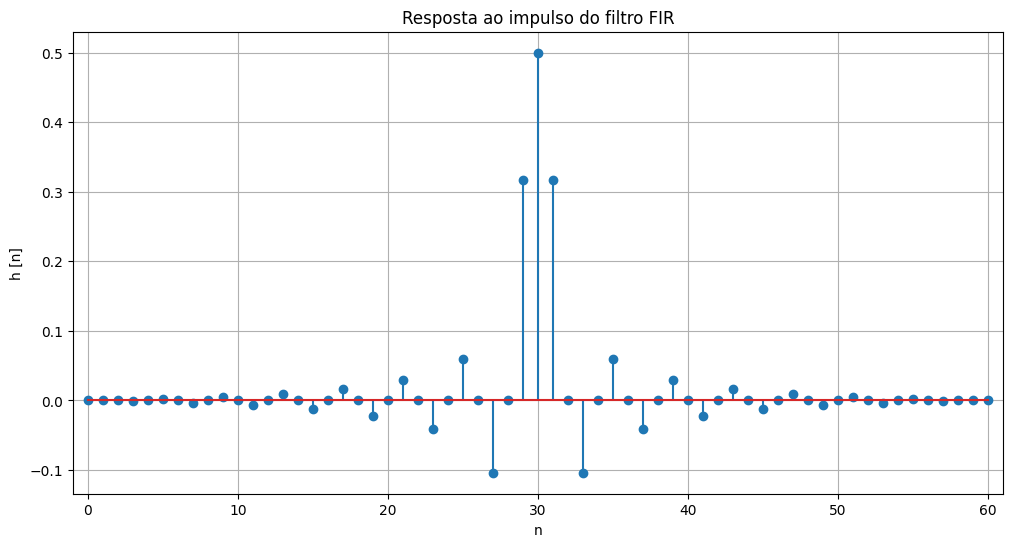

In [17]:
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(fir_direct)), fir_direct)
plt.title('Resposta ao impulso do filtro FIR')
plt.xlabel('n')
plt.ylabel('h [n]')
xlim = [-1, 61]
plt.xlim(xlim)
plt.grid(True)
plt.show()

Como esperado do filtro passa-baixas (tipo I) projetado, a resposta ao impulso do filtro projetado se aproxima de uma função sinc, com comprimento $M + 1$, com simetria par e centrada em $M/2$

In [6]:
omega_direct, response_direct = freqz(fir_direct, worN=10192)       # Calcula resposta do filtro na forma direta
omega_direct_norm = omega_direct / np.pi                            # Normaliza a frequência para o intervalo [0, 1]

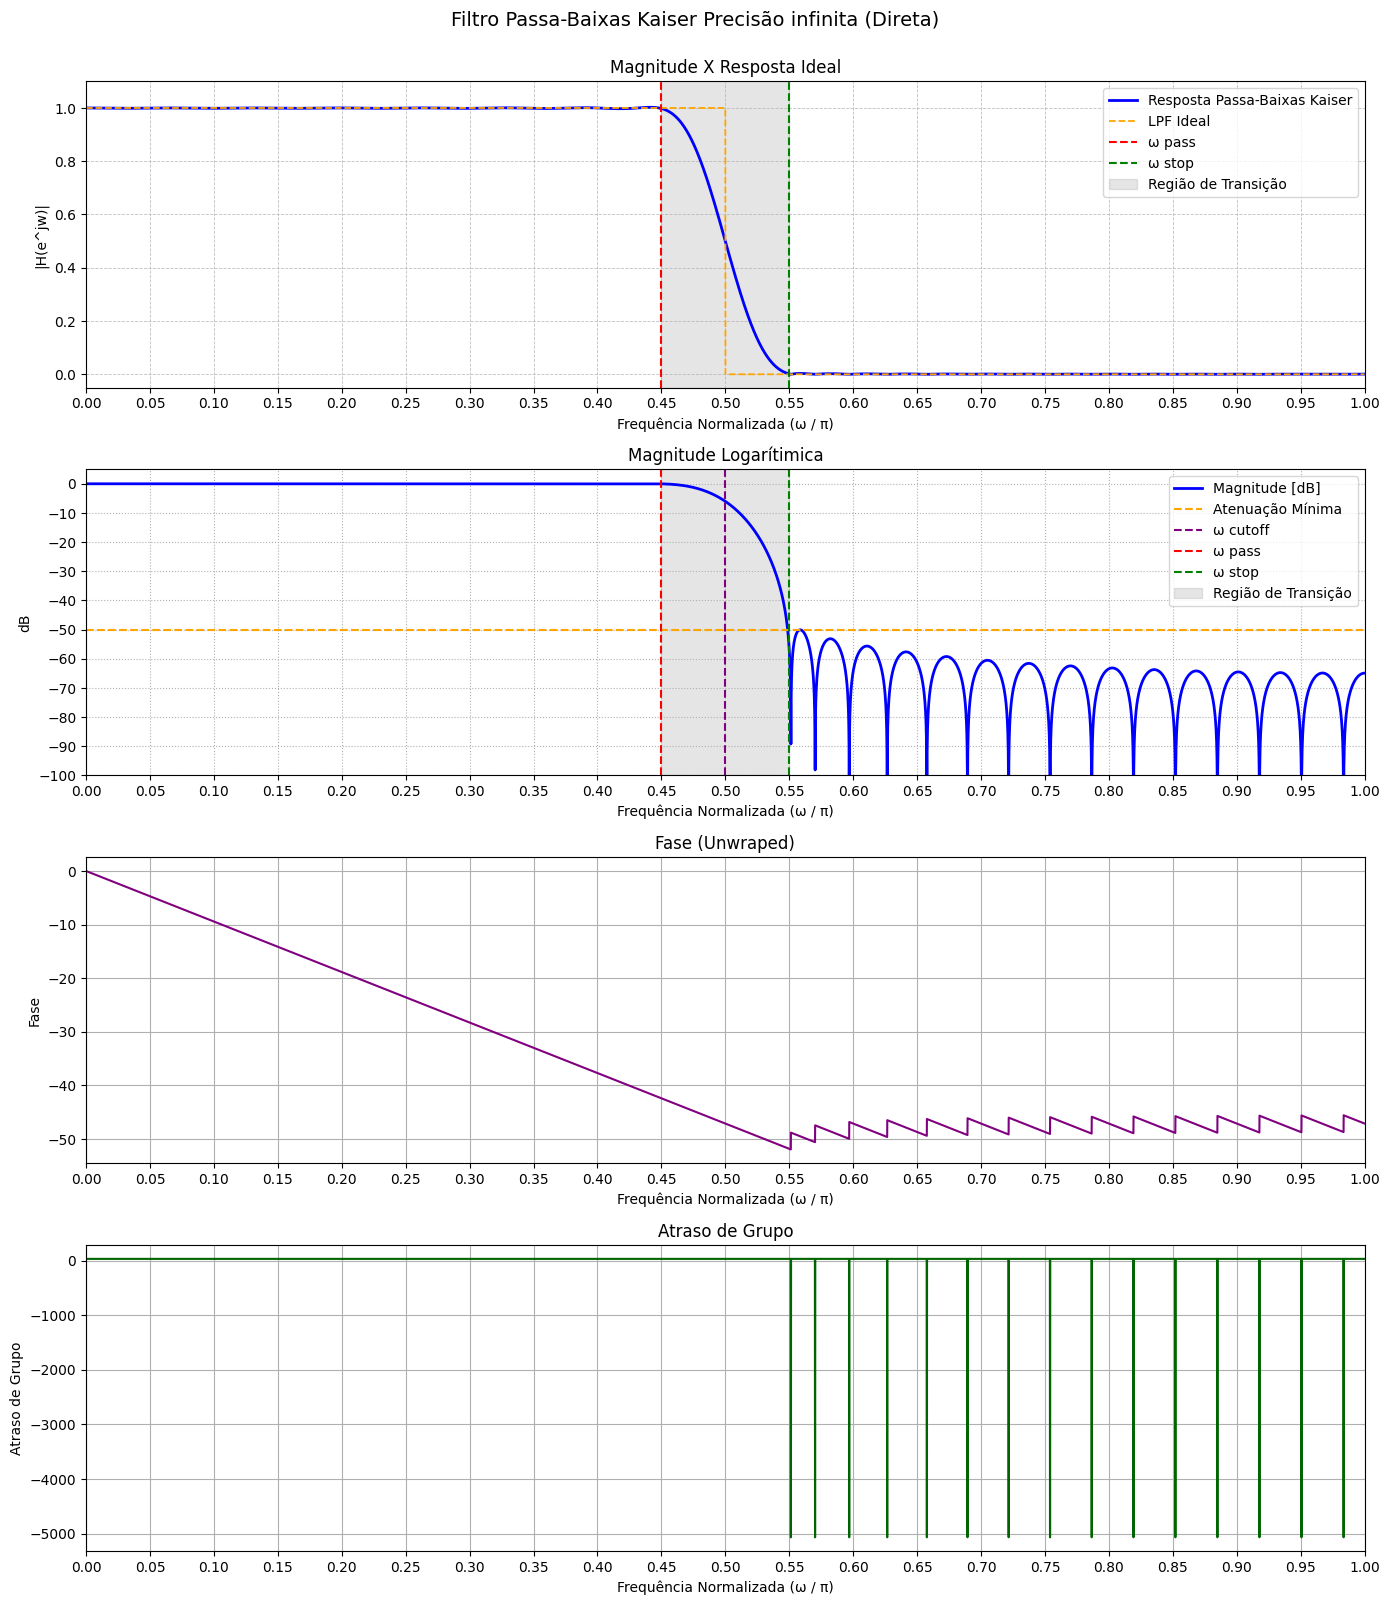

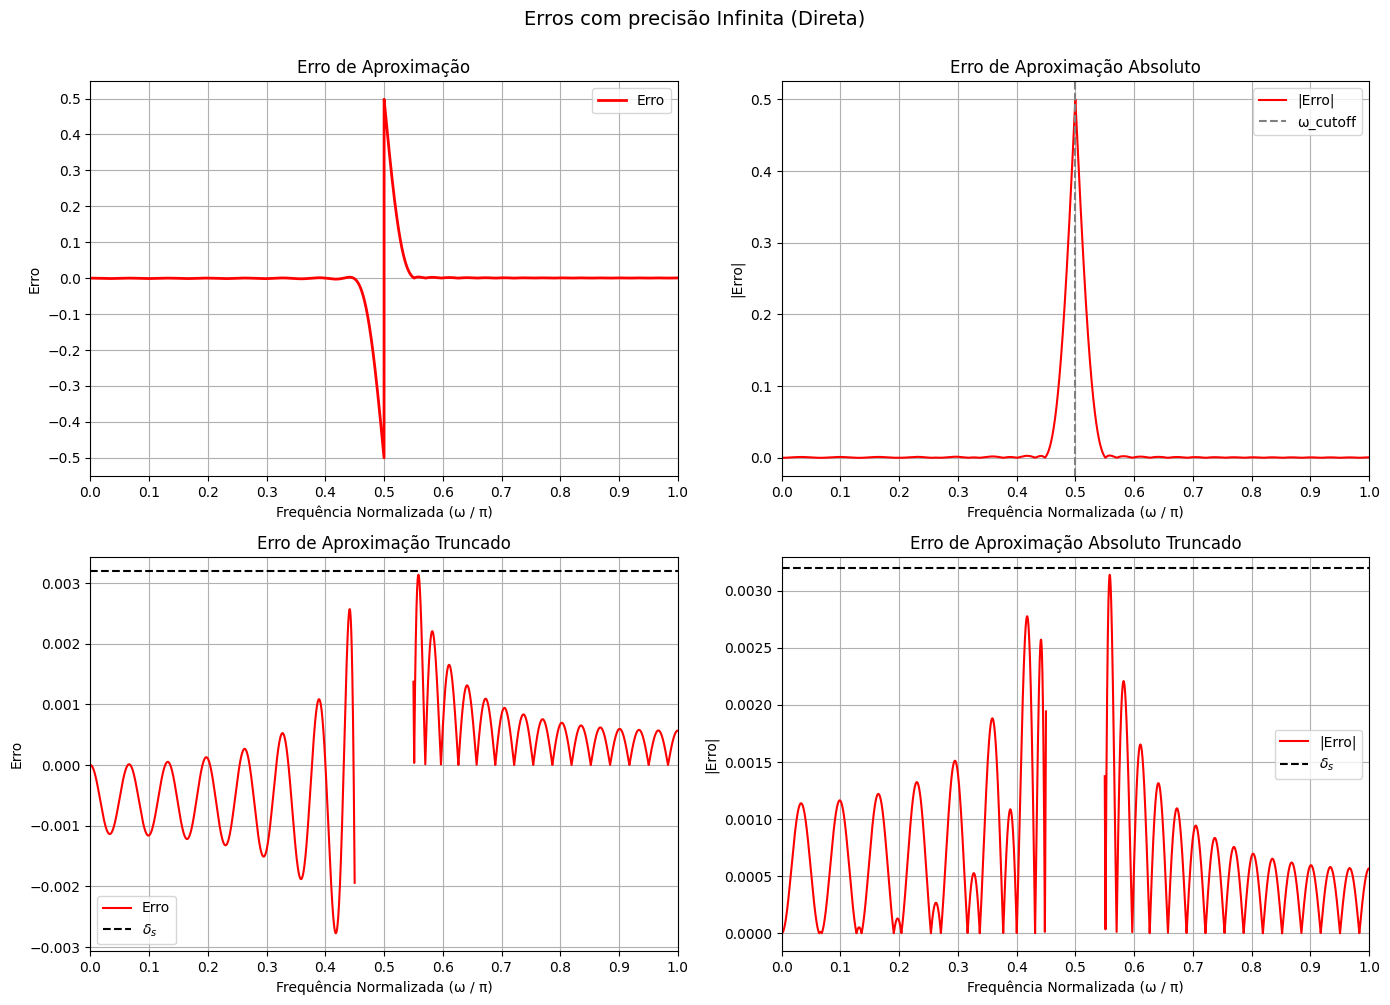

In [8]:
plot_graphs(omega_direct_norm, response_direct, 'Direta', 'infinita',True)
plot_errors(omega_direct_norm, response_direct, 'Direta', 'Infinita')


É possível observar que, ao utilizar o projeto por janela de Kaiser, tanto a banda passante quanto a banda de rejeição apresentam oscilações características. Esse comportamento está relacionado à limitação prática de não ser possível somar uma quantidade infinita de senoides na representação por séries de Fourier. Esse efeito é conhecido como fenômeno de Gibbs e é esperado para projetos de filtros que utilizando o janelamento.

Além disso, os gráficos da fase e do atraso de grupo apresentam o formato esperado para um filtro do tipo 1, onde na banda passante e na região de transição o atraso de grupo é constante, isto é, a fase é linear. Os impulsos na banda de rejeição ocorrem pois, nessa faixa, a magnitude assume valores muito baixos, o que leva problemas numéricos no cálculo da fase e, consequentemente, a variação rápida na fase, causa os impulsos no atraso de grupo.

Para a resposta em frequência (dB), fica evidente que, ao atingir a frequência de corte, o filtro está com uma atenuação de 50 dB. Além disso, também é possível perceber que os outros requisitos como largura da banda passante, da região de transição e outros também está sendo cumprida.

Como esperado, o erro máximo de aproximação não excede o valor de $\delta_s$ previamente especificado, nem para a banda de passagem nem para a banda de rejeição. Observa-se também que o pico do erro ocorre em $\omega_c$, o que era previsto, dado que nesse ponto o filtro ideal do tipo passa-baixas apresenta uma descontinuidade (i.e. ele muda abruptamente de 1 para 0). Já o filtro projetado com a janela de Kaiser gera uma transição contínua, resultando em uma diferença máxima em $\omega_c$.


## 3. Análise do Filtro na Estrutura em Cascata Com Precisão Infinita

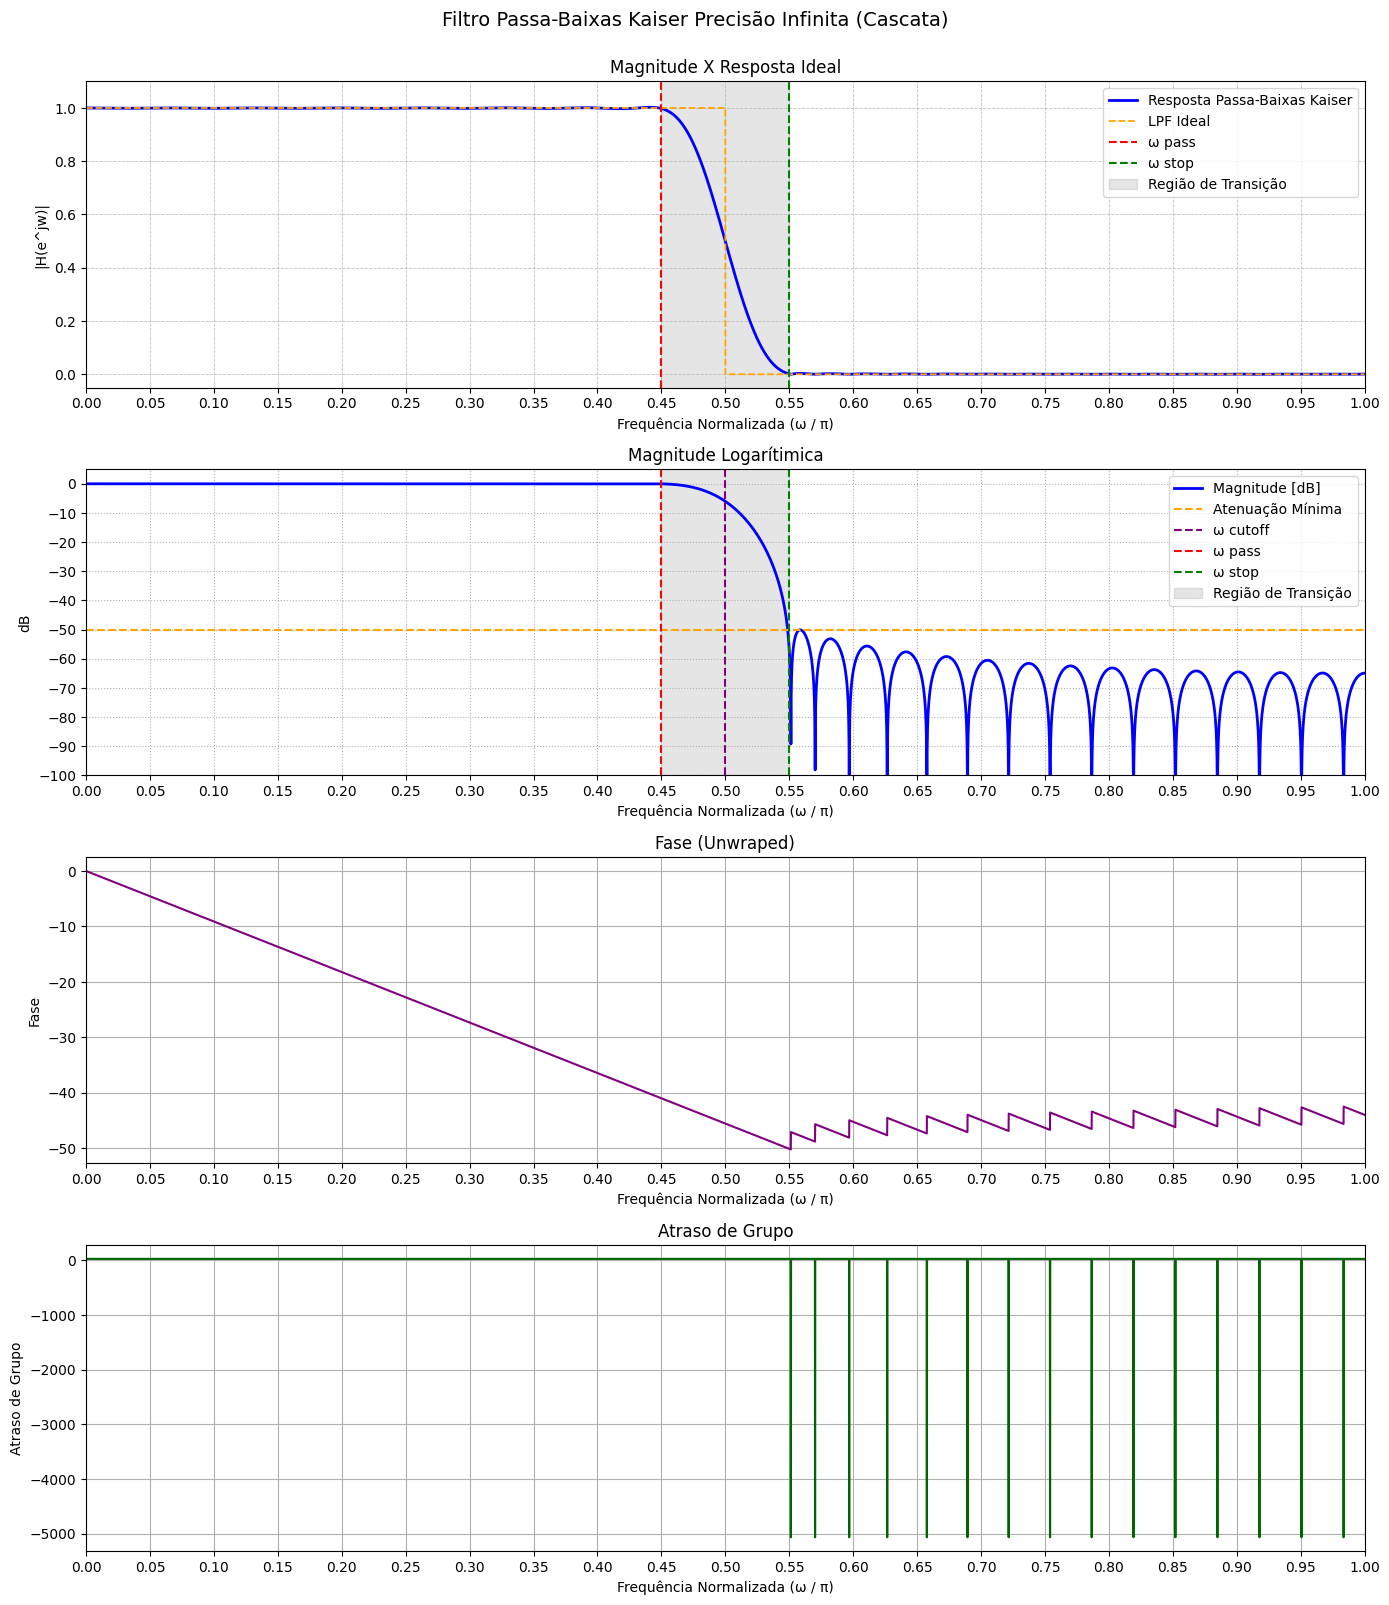

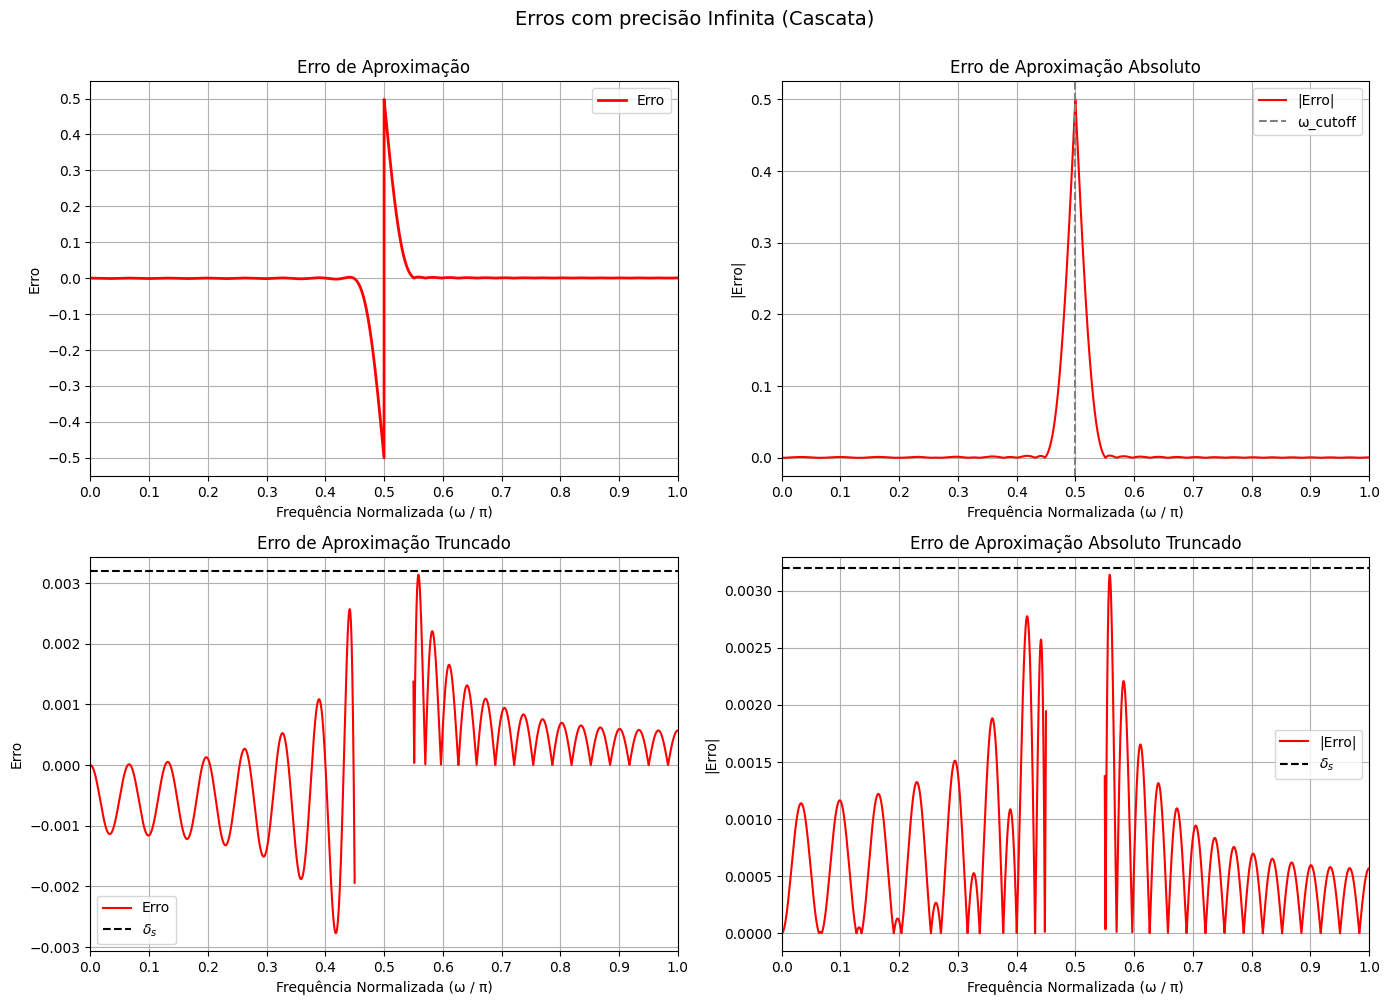

In [18]:
# Constrói o filtro usando a forma em cascata
fir_cascade = tf2sos(fir_direct, [1.0])

omega_cascade, response_cascade = sosfreqz(fir_cascade, worN=10192)   # Calcula resposta do filtro em cascata
omega_cascade_norm = omega_cascade / np.pi                            # Normaliza a frequência para o intervalo [0, 1]

plot_graphs(omega_cascade_norm, response_cascade, 'Cascata', 'Infinita', True)
plot_errors(omega_cascade_norm, response_cascade, 'Cascata', 'Infinita')

Pela análise realizada, observa-se que, sob precisão infinita, a resposta em frequência dos filtros projetados nas formas direta e em cascata apresenta variações insignificantes. Conforme descrito por Oppenheim, Schafer e Buck (2010):

> OPPENHEIM, Alan V.; SCHAFER, Ronald W.; BUCK, John R. *Processamento de sinais em tempo discreto*. 3. ed. São Paulo: Pearson Prentice Hall, 2010.

Esse comportamento é esperado, uma vez que ambas as implementações são teoricamente equivalentes na ausência de limitações numéricas. Neste caso, a precisão de 64 bits em ponto flutuante utilizada pela linguagem de programação é suficiente para que os efeitos da quantização sejam desprezíveis.

Para avaliar os impactos da precisão numérica, os mesmos filtros serão projetados a seguir com restrições na representação dos coeficientes.


## 4. Avaliação do Impacto da Quantização de Parâmetros

### Forma Direta

#### 8 Casas Decimais

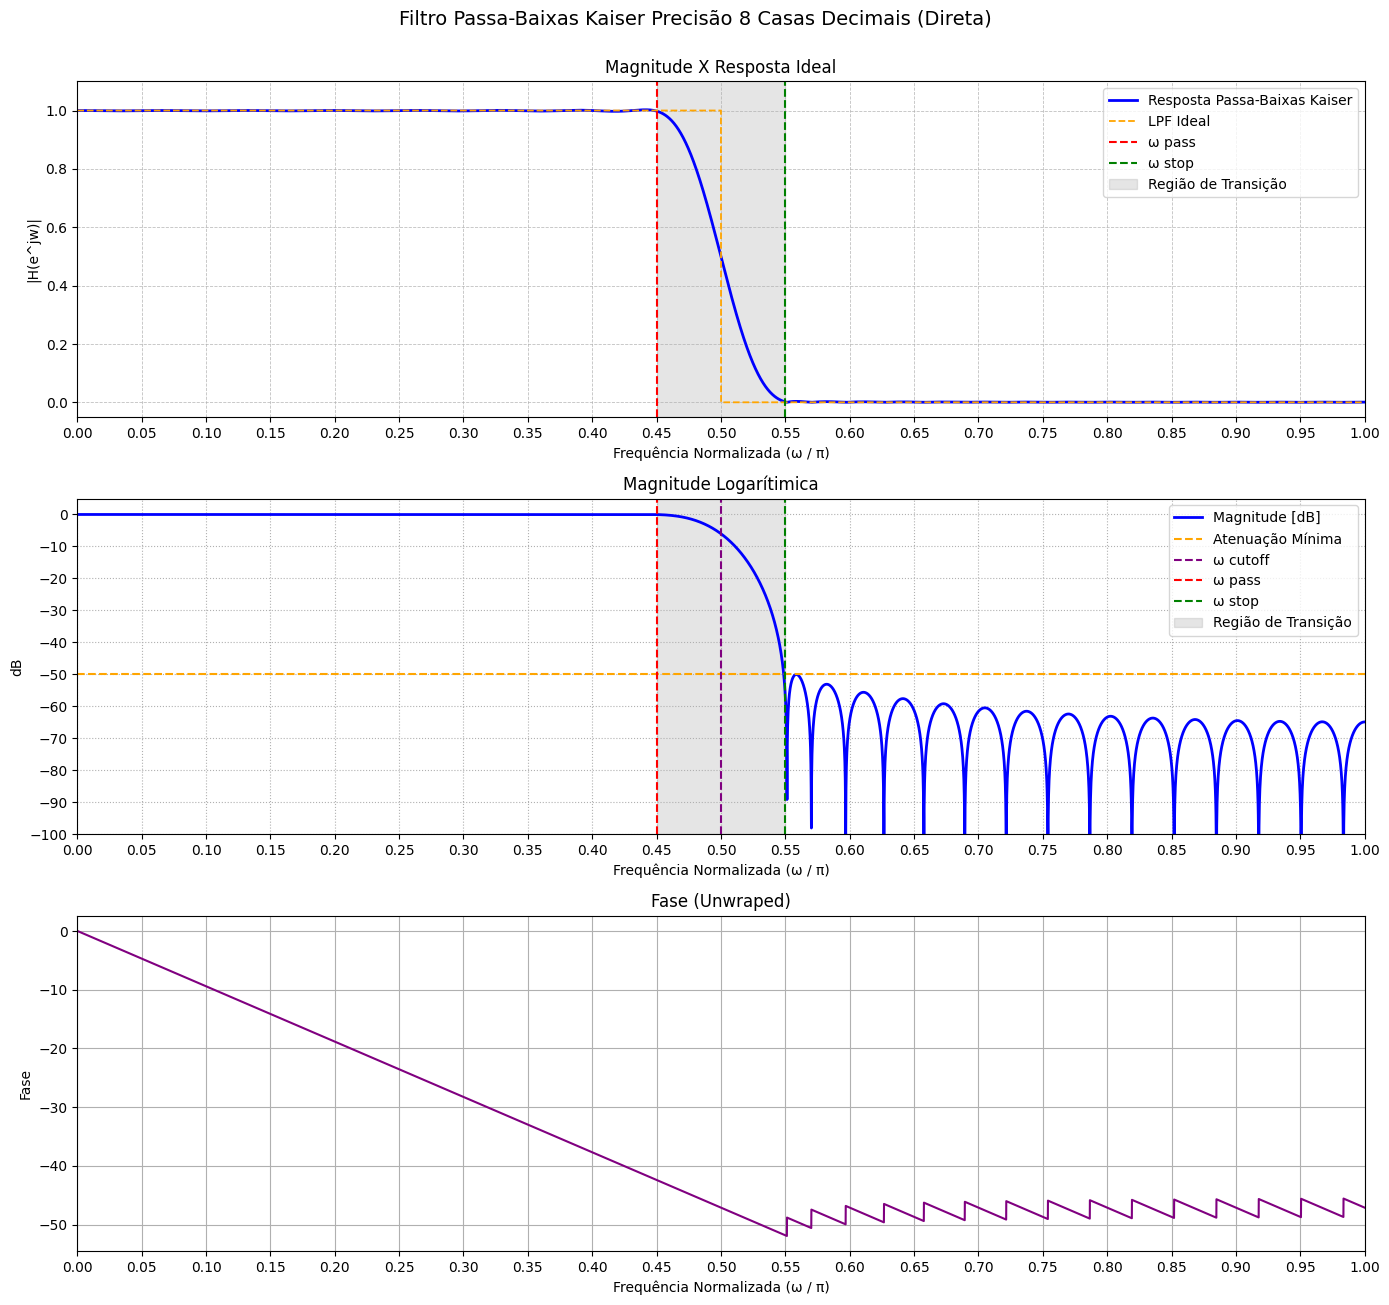

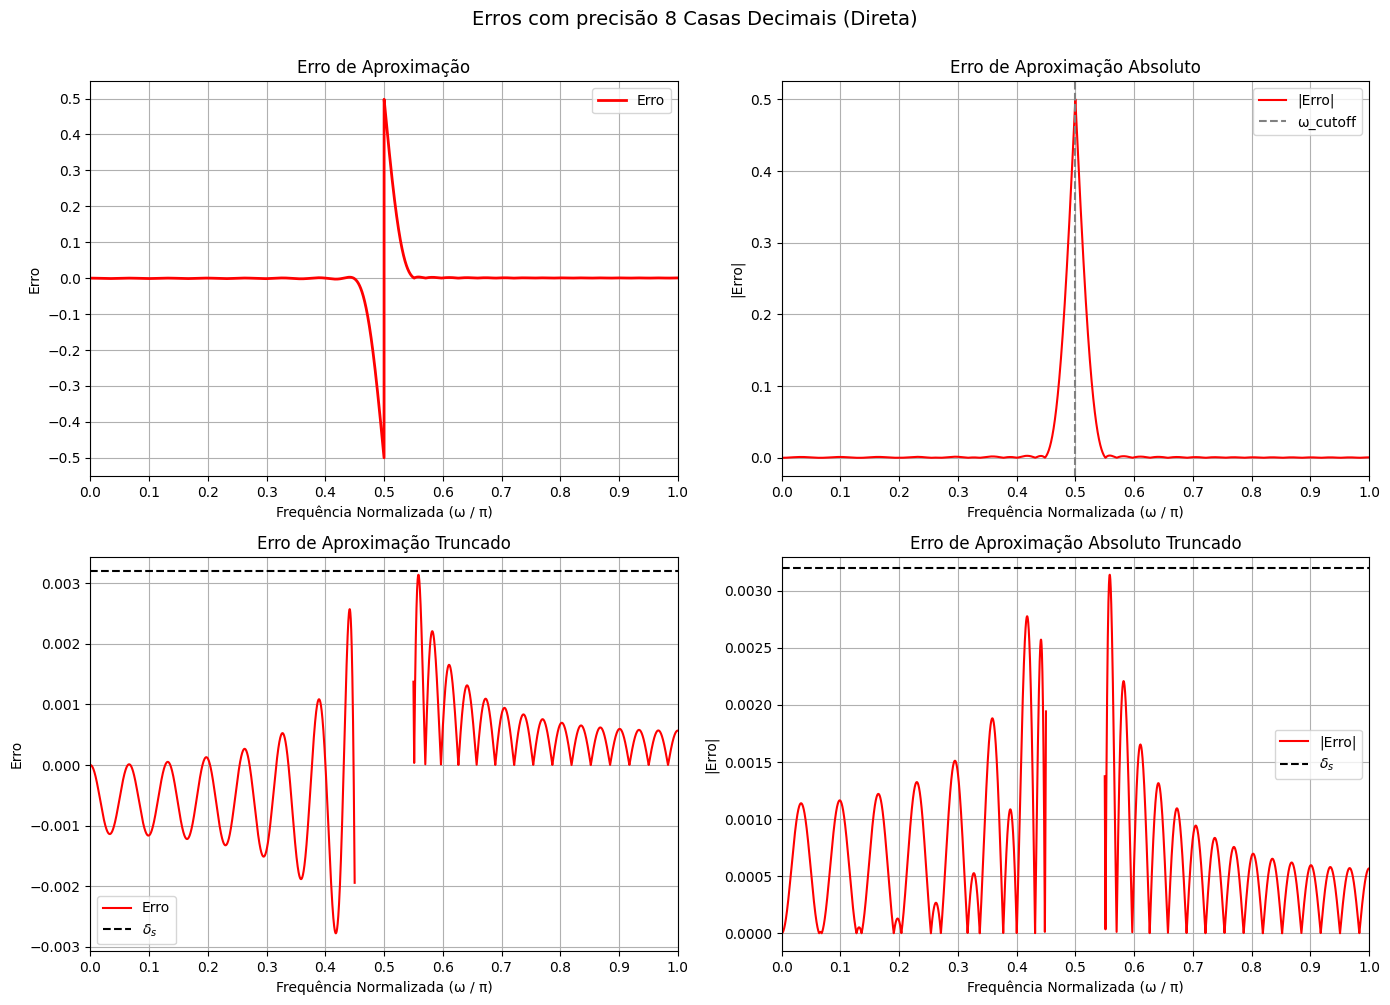

In [10]:
fir_direct_8dec = np.round(fir_direct, 8)

omega_direct_8dec, response_direct_8dec = freqz(fir_direct_8dec, worN=10192) # Calcula resposta do filtro na forma direta
omega_direct_norm_8dec = omega_direct_8dec / np.pi

plot_graphs(omega_direct_norm_8dec, response_direct_8dec, "Direta", "8 Casas Decimais")
plot_errors(omega_direct_norm_8dec, response_direct_8dec, 'Direta', '8 Casas Decimais')

PARA 8 NÃO MUDOU 

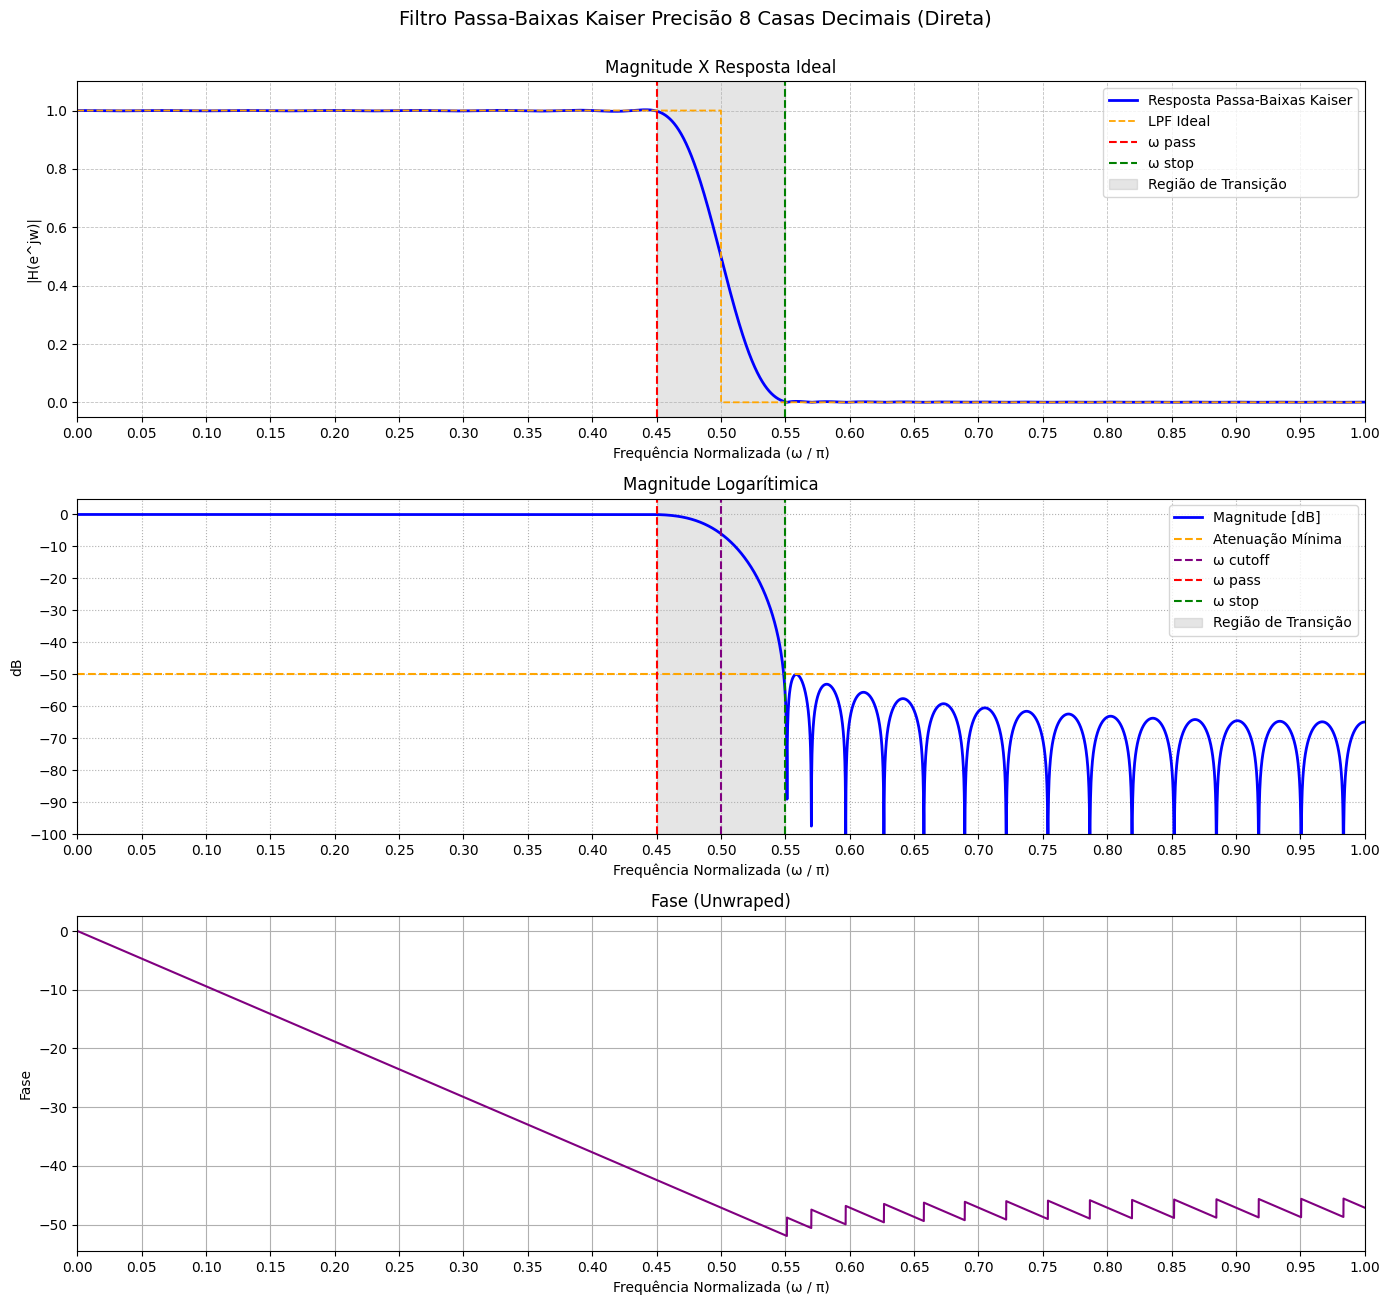

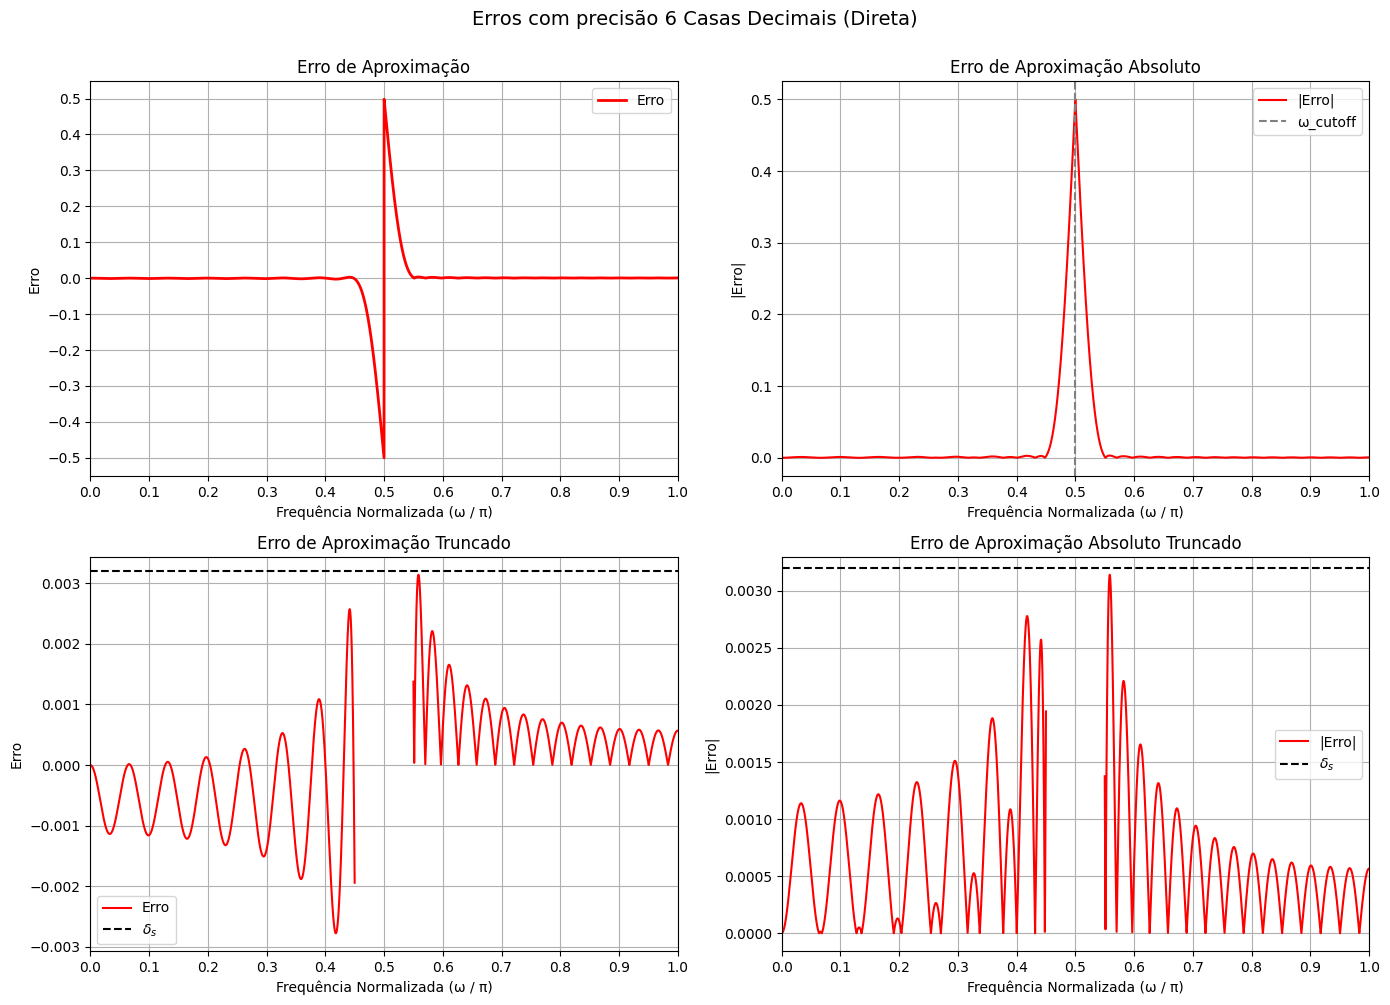

In [11]:
fir_direct_6dec = np.round(fir_direct, 6)

omega_direct_6dec, response_direct_6dec = freqz(fir_direct_6dec, worN=10192) # Calcula resposta do filtro na forma direta
omega_direct_norm_6dec = omega_direct_6dec / np.pi                           # Normaliza a frequência para o intervalo [0, 1]

plot_graphs(omega_direct_norm_6dec, response_direct_6dec, "Direta", "8 Casas Decimais")
plot_errors(omega_direct_norm_6dec, response_direct_6dec, 'Direta', '6 Casas Decimais')

#### 6 Casas Decimais 

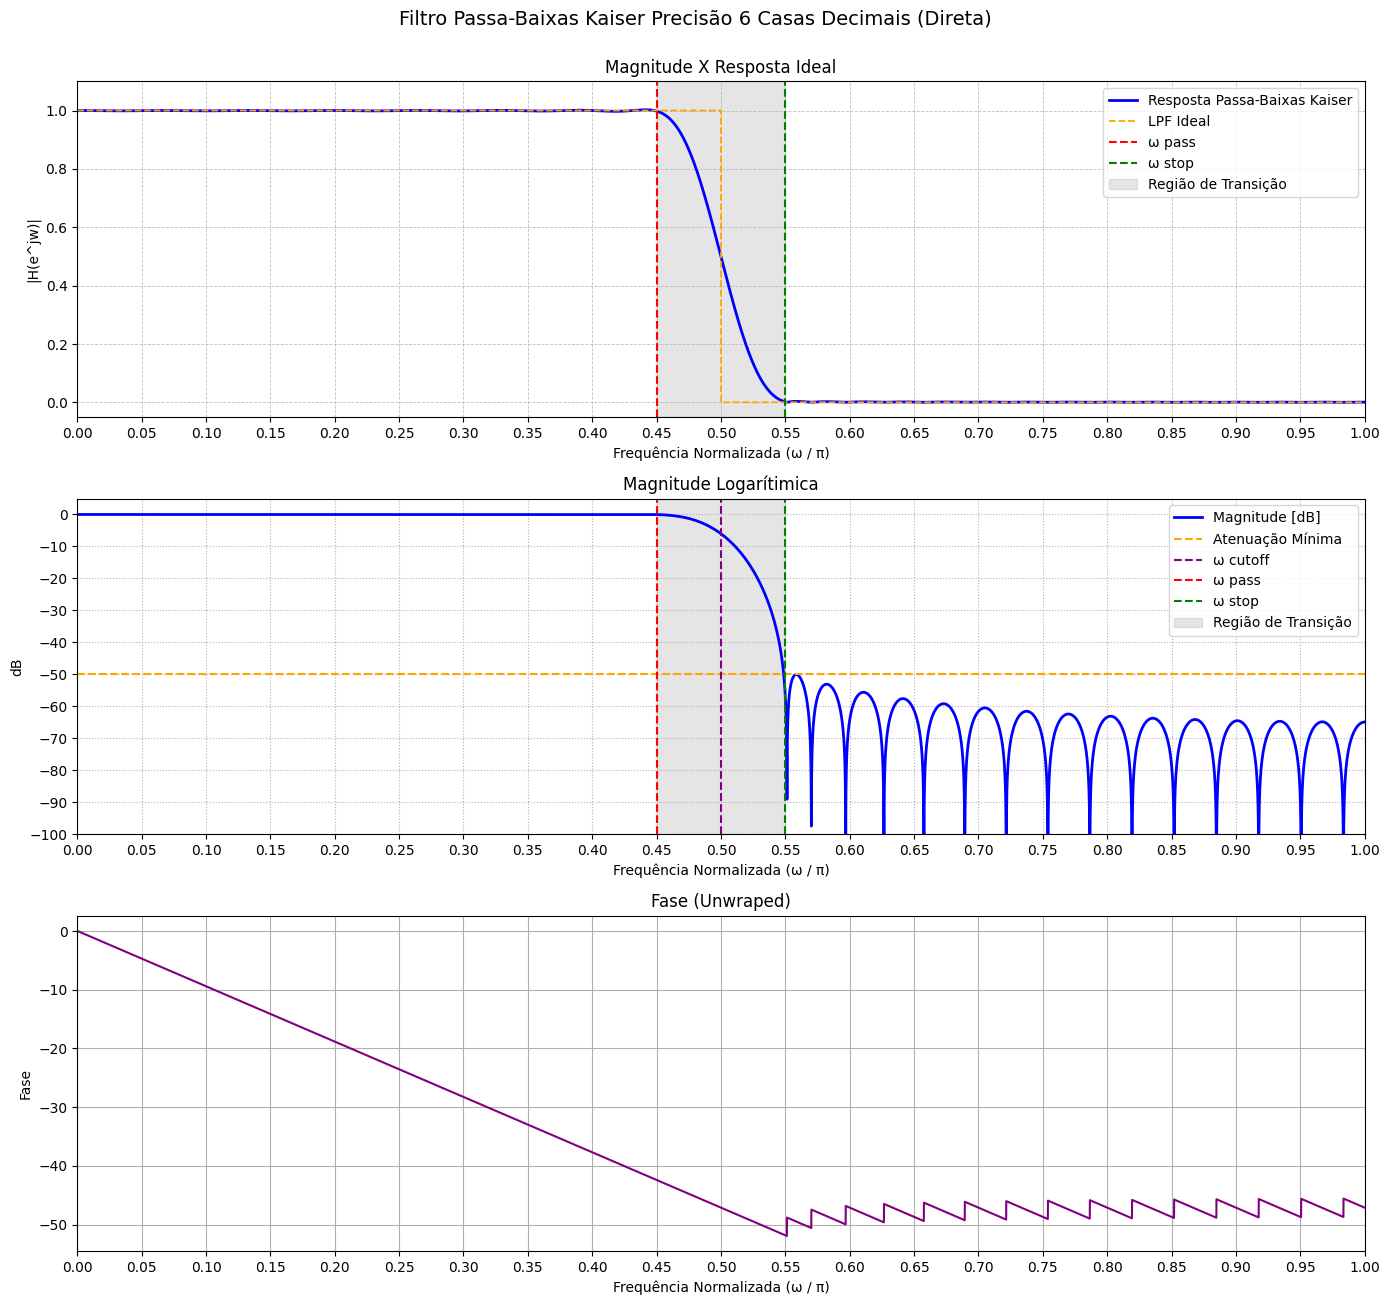

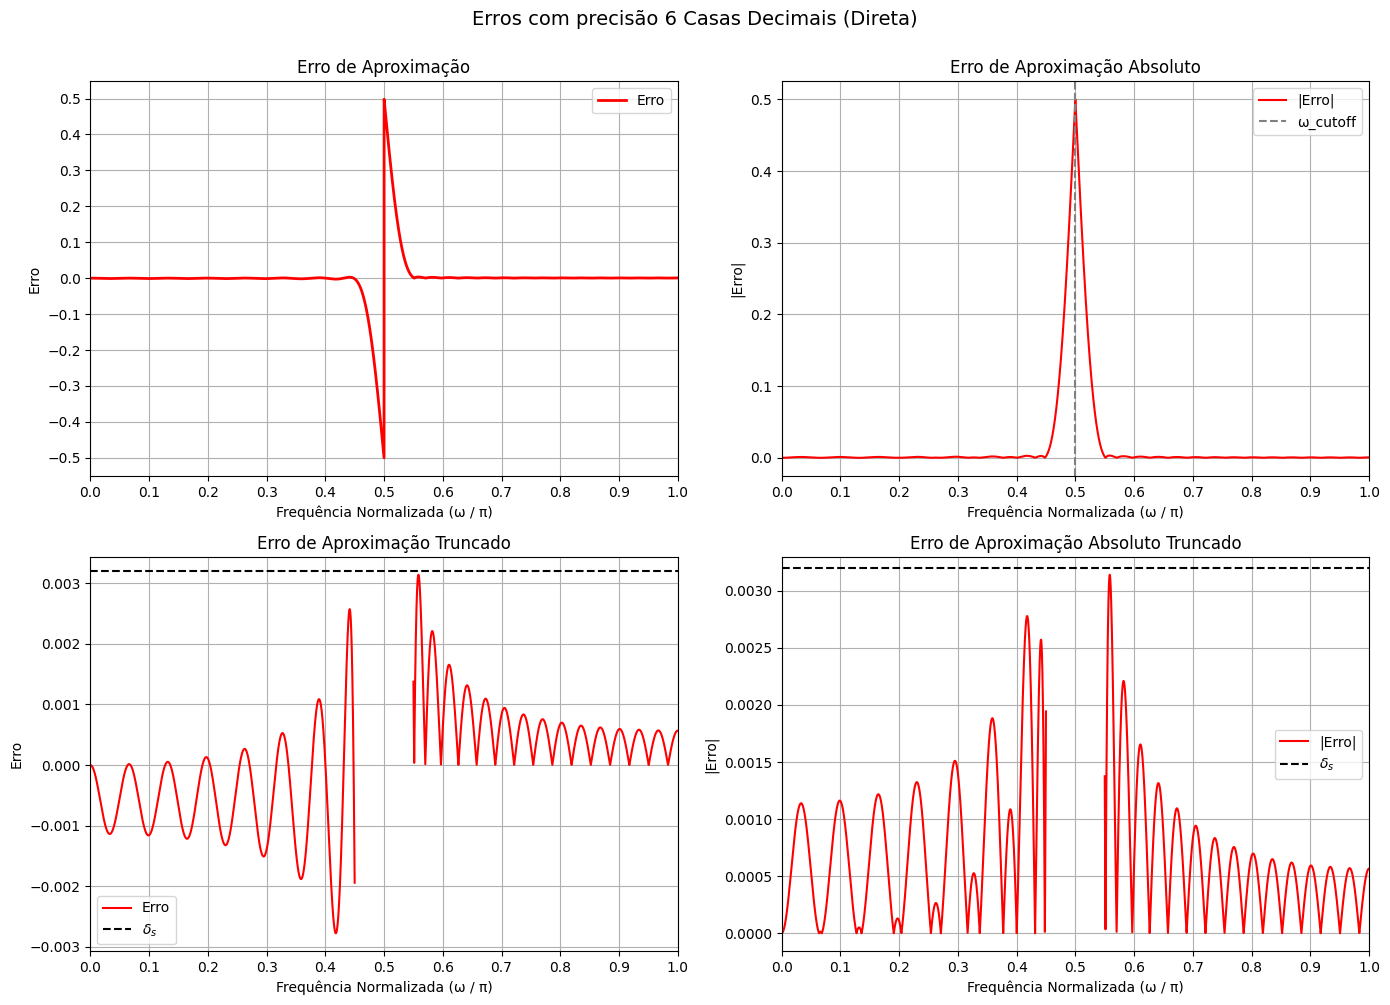

In [12]:
fir_direct_6dec = np.round(fir_direct, 6)

omega_direct_6dec, response_direct_6dec = freqz(fir_direct_6dec, worN=10192) # Calcula resposta do filtro na forma direta
omega_direct_norm_6dec = omega_direct_6dec / np.pi                        # Normaliza a frequência para o intervalo [0, 1]

plot_graphs(omega_direct_norm_6dec, response_direct_6dec, 'Direta', '6 Casas Decimais')
plot_errors(omega_direct_norm_6dec, response_direct_6dec, 'Direta', '6 Casas Decimais')

COLOCAR ANALISE AQ

#### 4 Casas Decimais

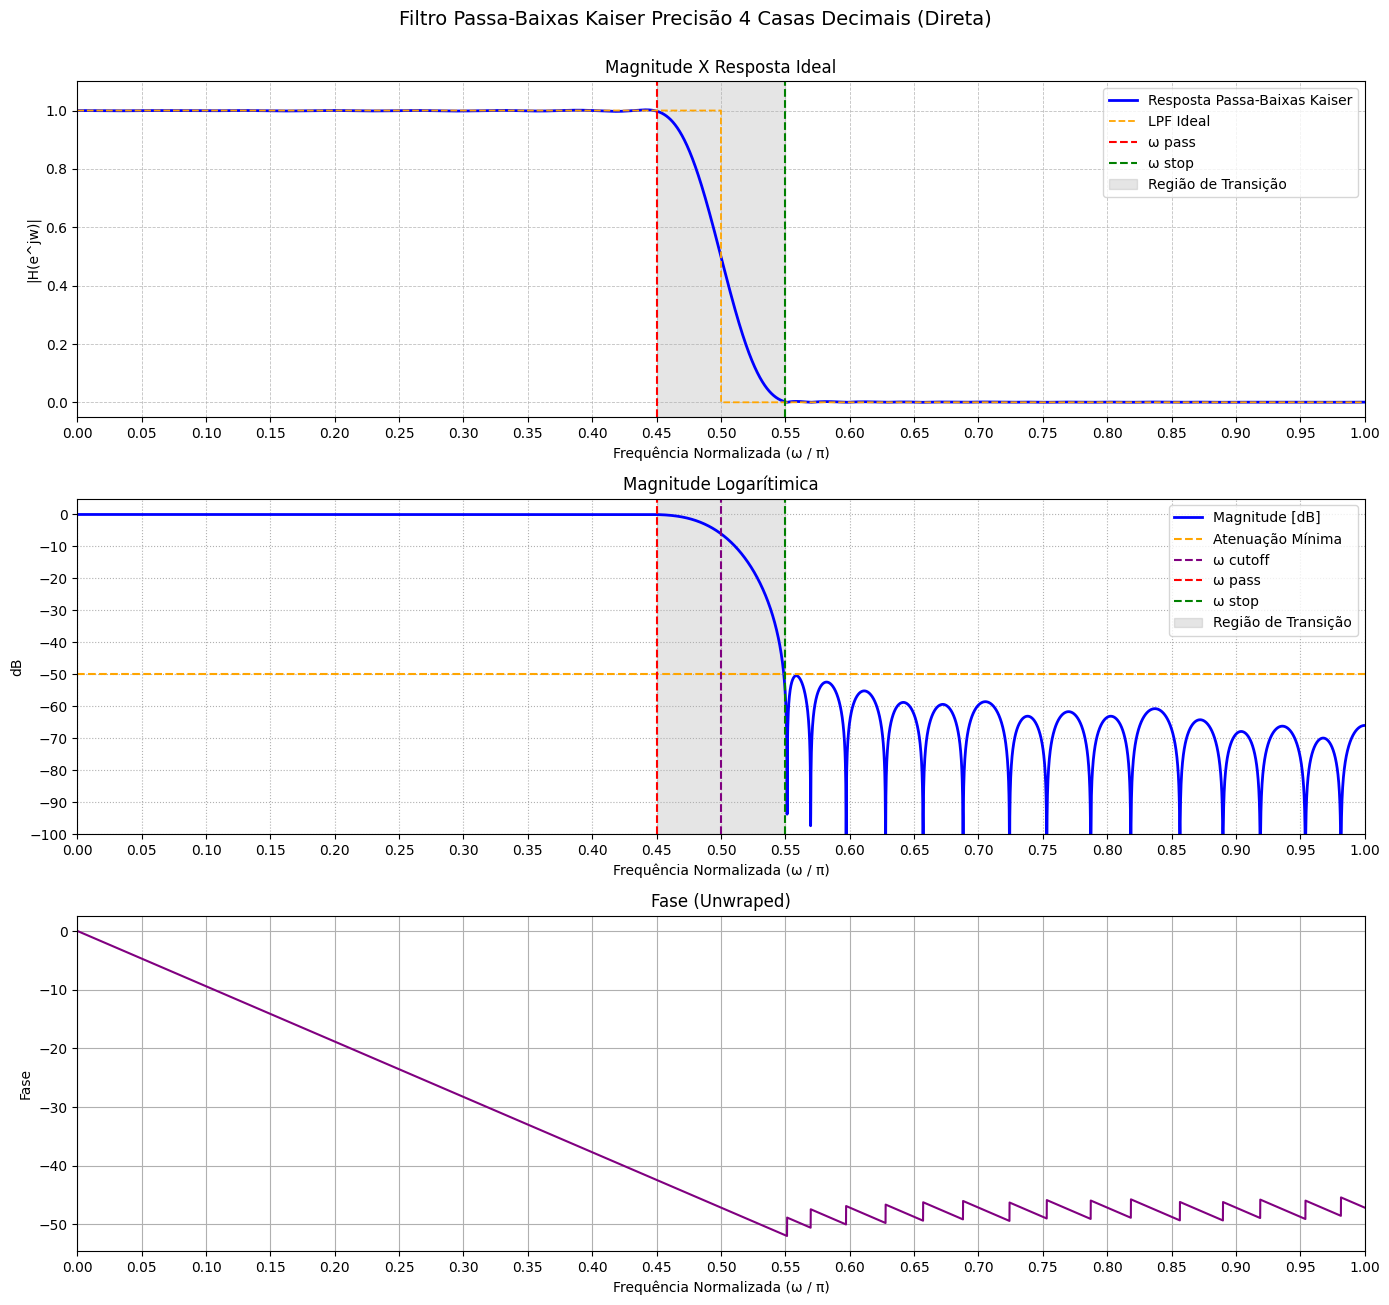

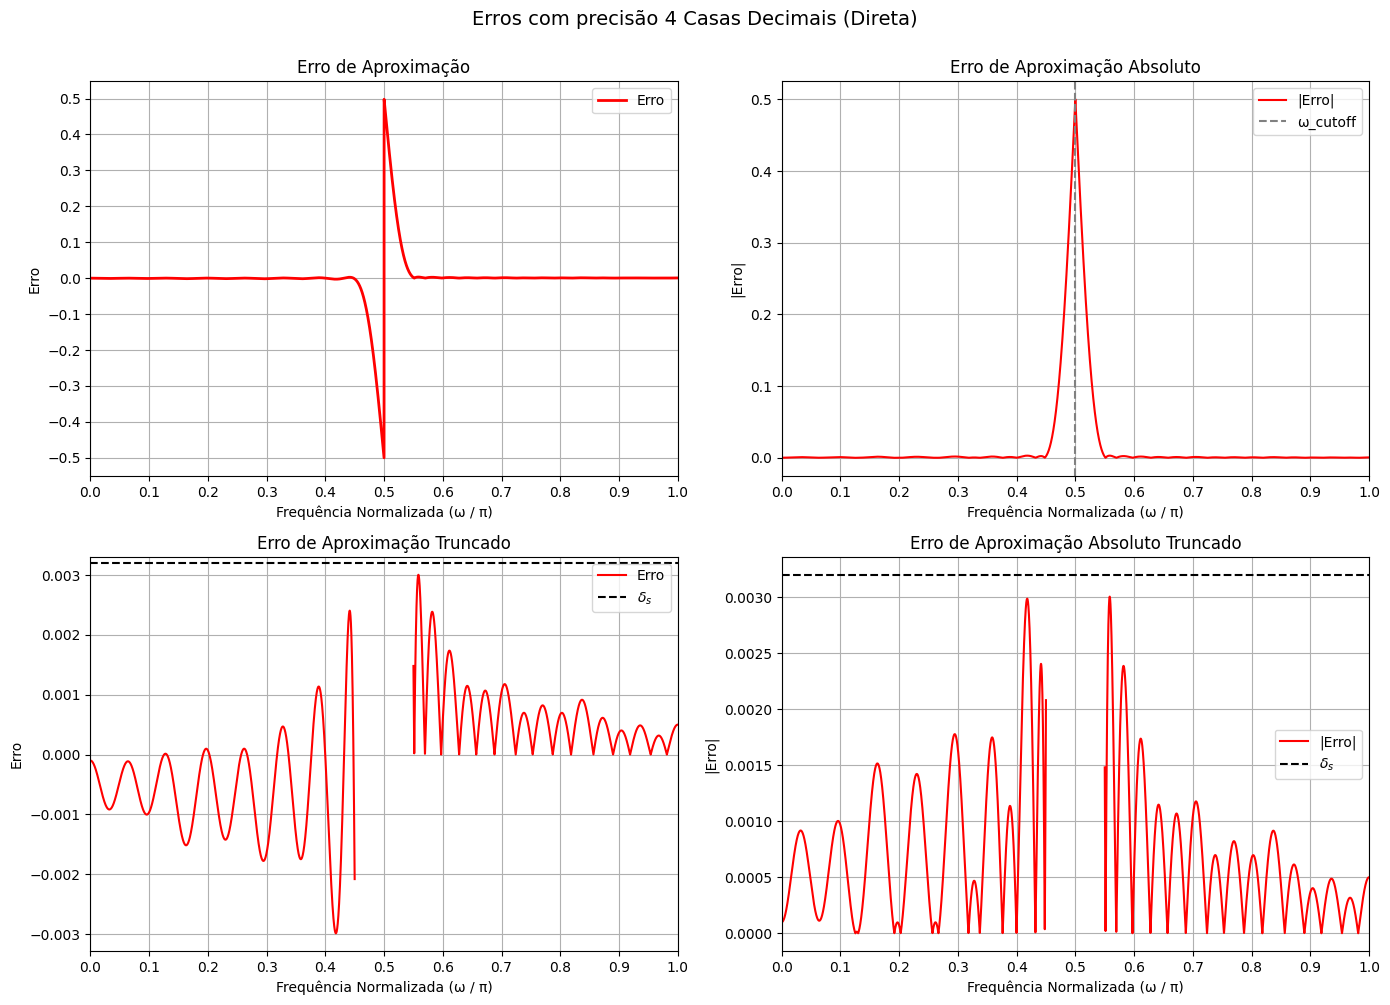

In [13]:
fir_direct_4dec = np.round(fir_direct, 4)

omega_direct_4dec, response_direct_4dec = freqz(fir_direct_4dec, worN=10192) 
omega_direct_norm_4dec = omega_direct_4dec / np.pi                           

plot_graphs(omega_direct_norm_4dec, response_direct_4dec, 'Direta', '4 Casas Decimais')
plot_errors(omega_direct_norm_4dec, response_direct_4dec, 'Direta', '4 Casas Decimais')

Colocar aanalise aq

#### 3 Casas Decimais

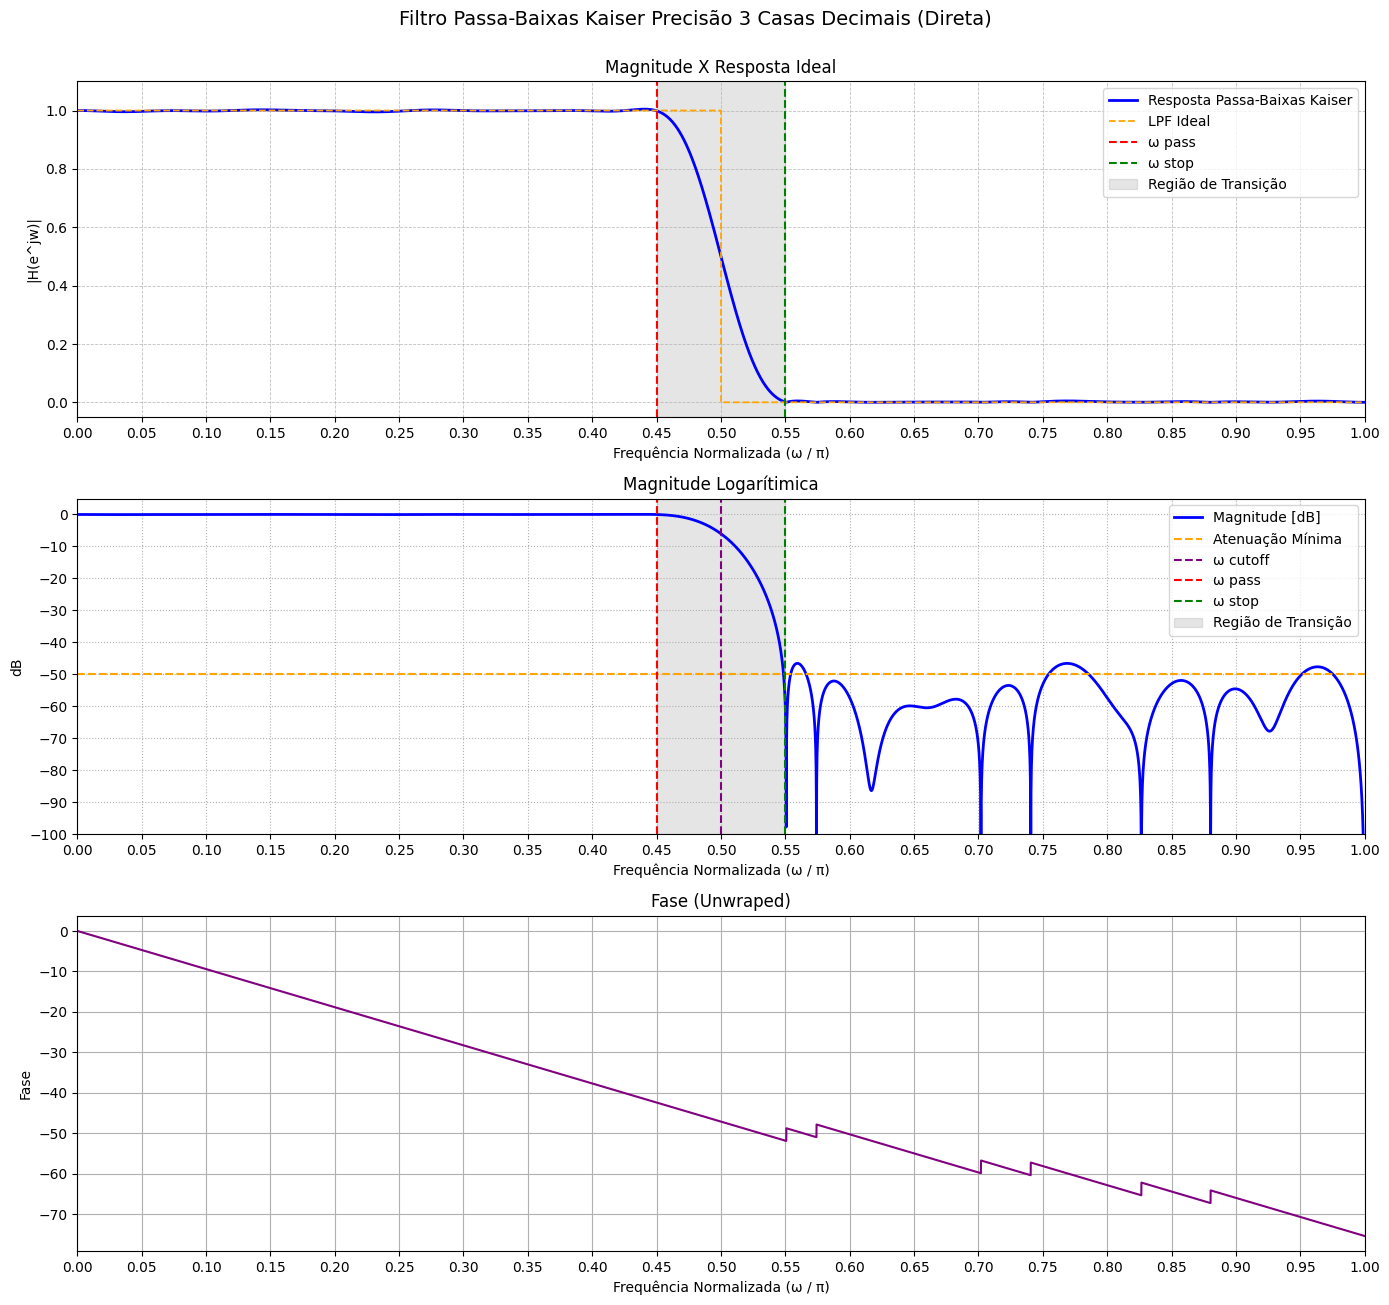

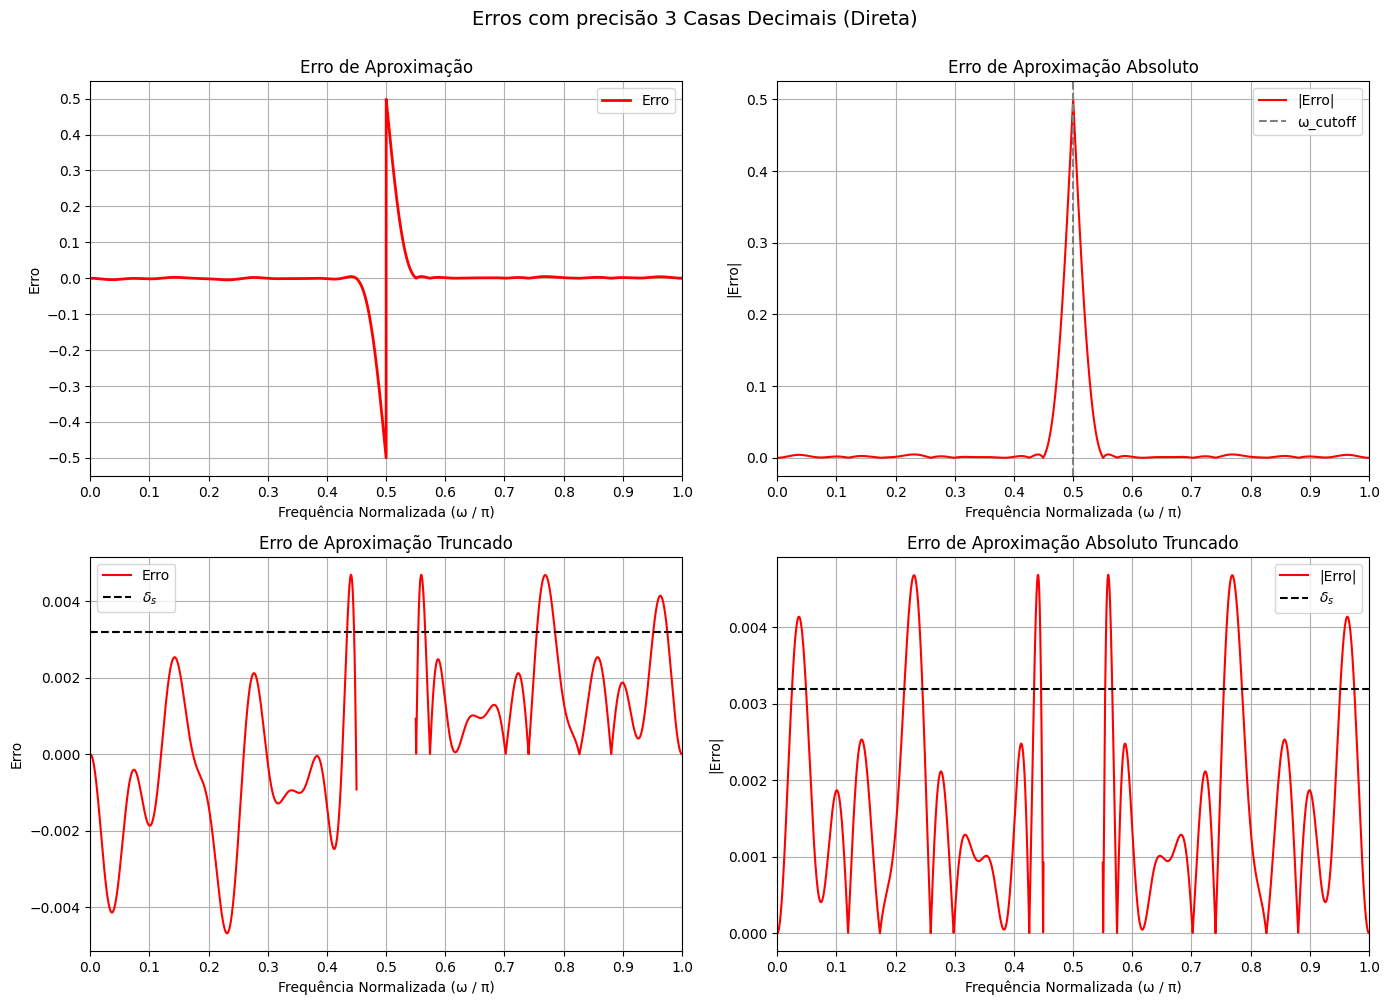

In [14]:
fir_direct_3dec = np.round(fir_direct, 3)

omega_direct_3dec, response_direct_3dec = freqz(fir_direct_3dec, worN=10192) 
omega_direct_norm_3dec = omega_direct_3dec / np.pi                           

plot_graphs(omega_direct_norm_3dec, response_direct_3dec, 'Direta', '3 Casas Decimais')
plot_errors(omega_direct_norm_3dec, response_direct_3dec, 'Direta', '3 Casas Decimais')

#### 2 Casas Decimais

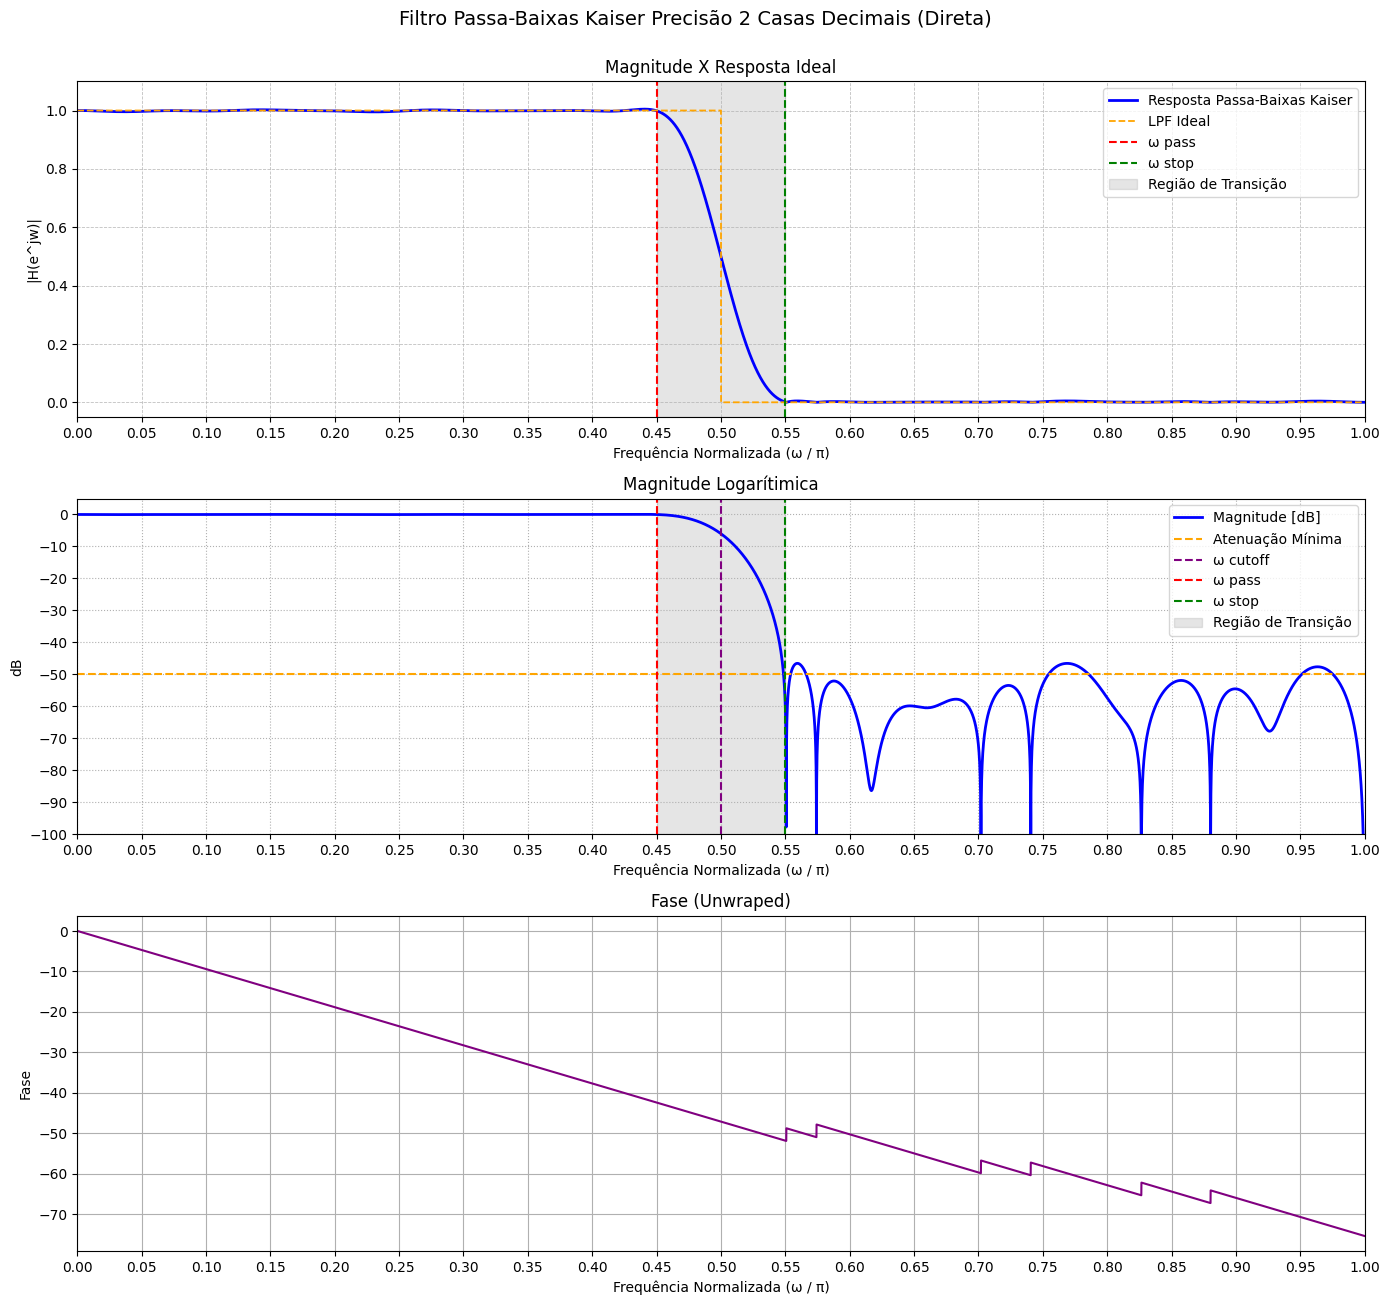

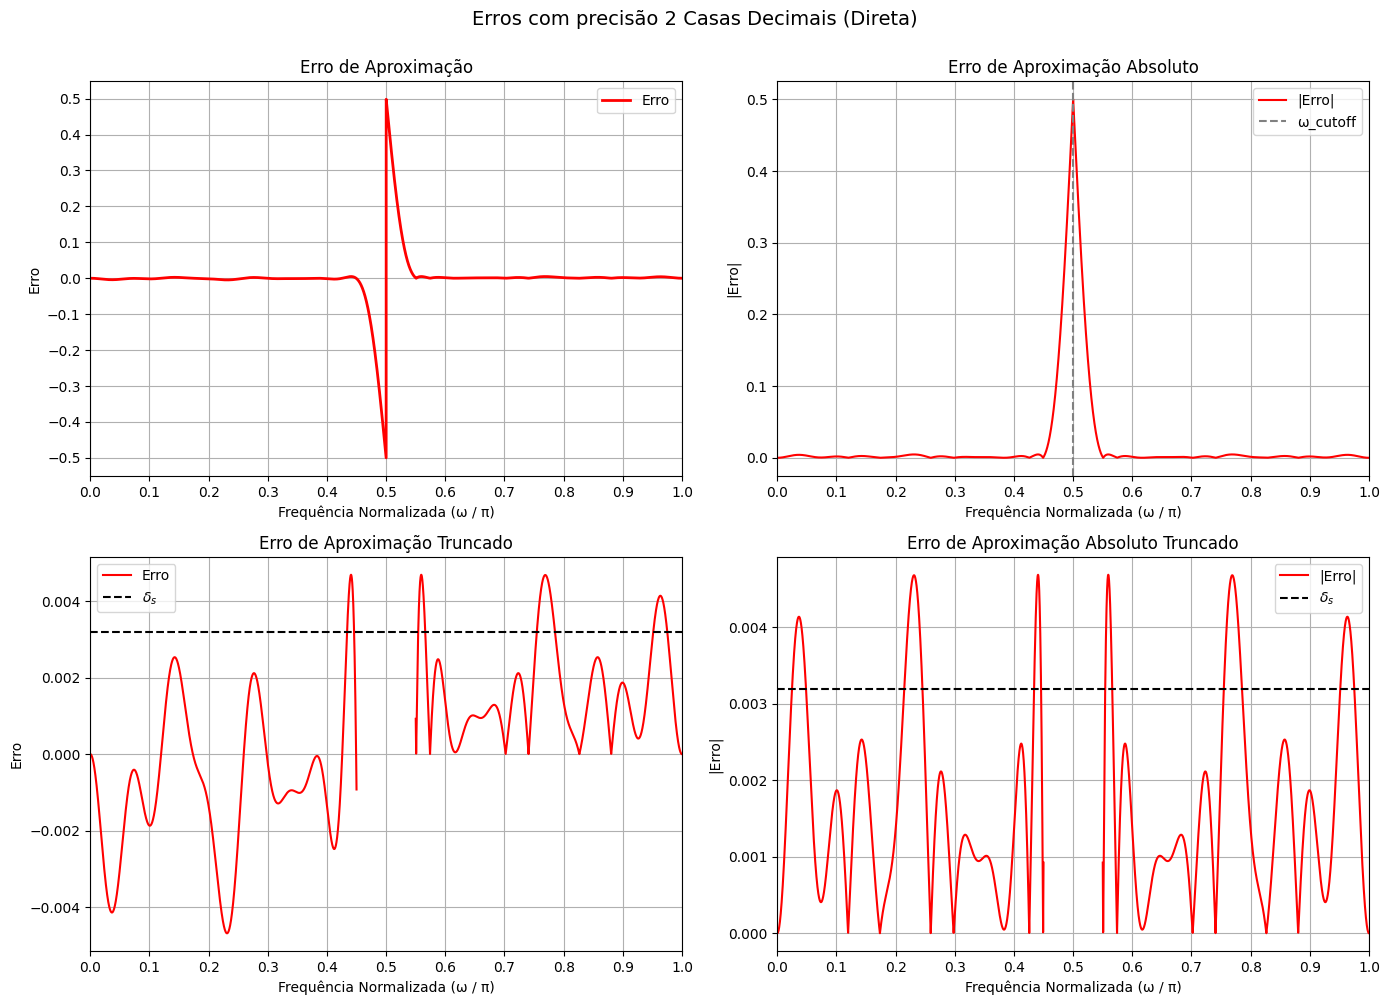

In [15]:
fir_direct_2dec = np.round(fir_direct, 3)

omega_direct_2dec, response_direct_2dec = freqz(fir_direct_2dec, worN=10192) 
omega_direct_norm_2dec = omega_direct_2dec / np.pi                           

plot_graphs(omega_direct_norm_2dec, response_direct_2dec, 'Direta', '2 Casas Decimais')
plot_errors(omega_direct_norm_2dec, response_direct_2dec, 'Direta', '2 Casas Decimais')

#### 1 Casa Decimal

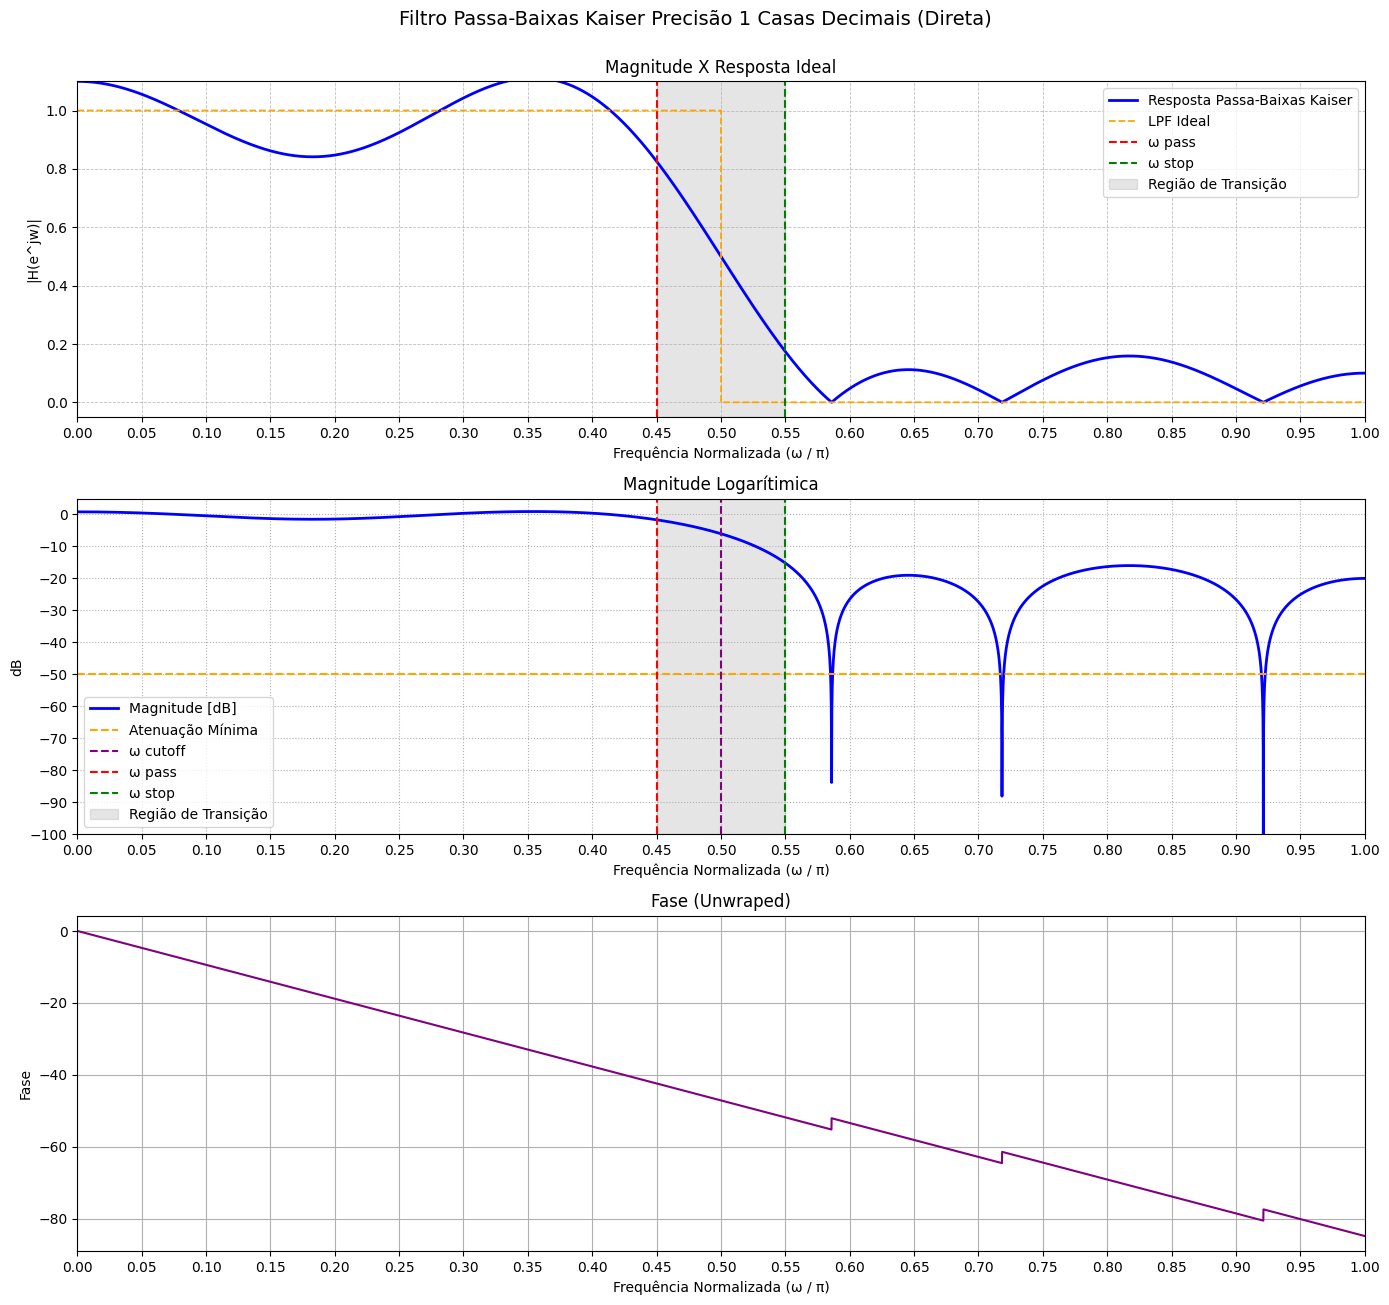

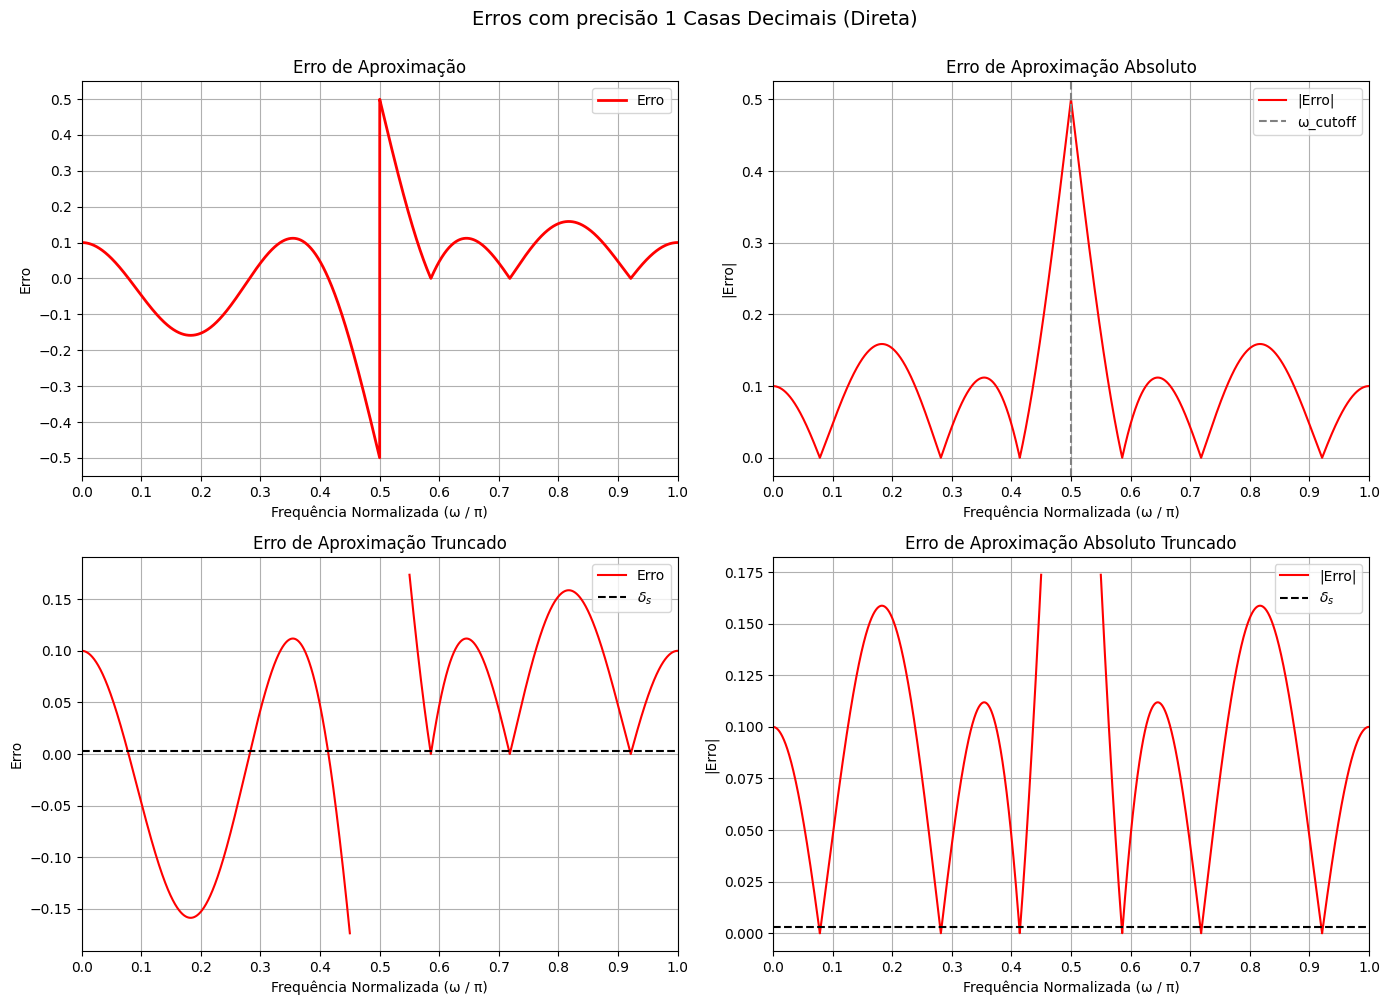

In [16]:
fir_direct_1dec = np.round(fir_direct, 1)

omega_direct_1dec, response_direct_1dec = freqz(fir_direct_1dec, worN=10192) 
omega_direct_norm_1dec = omega_direct_1dec / np.pi                           

plot_graphs(omega_direct_norm_1dec, response_direct_1dec, 'Direta', '1 Casas Decimais')
plot_errors(omega_direct_norm_1dec, response_direct_1dec, 'Direta', '1 Casas Decimais')

### Forma em Cascata